#  <br>     <font color = green> ADTA 5940 - Capstone Project <a></a>

## Import the libraries

In [1]:
# These are the libraries required for data manipulation and data handling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# These are the libraries required for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

# Importing datetime library to create 'age' column from birthdate

from datetime import datetime

# Import statistical model libraries

import statsmodels.api as sm

# Import machine learning model and SMOTE libraries

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# To ignore unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

## Load and read the NFL Sports Injuries data set

In [2]:
# Load the dataset

df= pd.read_csv(r"C:\Users\adity\Desktop\Cpastone data\Final dataset.csv")
df

,season,game_type.x,team.x,week.x,gsis_id,full_name.x,first_name.x,last_name.x,report_primary_injury,report_secondary_injury,...,status,birth_date,height,weight,college,years_exp,rookie_year,draft_club,draft_number,Birth Year
0,2019,REG,ARI,1,00-0022161,Terrell Suggs,Terrell,Suggs,NaN,NaN,...,ACT,10/11/1982,75,265,Arizona State,16,2003,BAL,10.0,1982
1,2019,REG,ARI,1,00-0035536,Lamont Gaillard,Lamont,Gaillard,Knee,NaN,...,INA,2/8/1996,75,305,Georgia,0,2019,ARI,179.0,1996
2,2019,REG,ARI,1,00-0028001,Marcus Gilbert,Marcus,Gilbert,Knee,NaN,...,RES,2/15/1988,78,330,Florida,8,2011,PIT,NaN,1988
3,2019,REG,ARI,1,00-0033875,Haason Reddick,Haason,Reddick,Knee,NaN,...,ACT,9/22/1994,73,235,Temple,2,2017,ARI,13.0,1994
4,2019,REG,ARI,1,00-0034490,Ezekiel Turner,Ezekiel,Turner,Hand,NaN,...,ACT,6/9/1996,74,214,Washington,1,2018,NaN,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27916,2023,WC,TB,19,00-0036406,Tristan Wirfs,Tristan,Wirfs,NaN,NaN,...,ACT,1/24/1999,77,322,Iowa,3,2020,TB,13.0,1999
27917,2023,WC,TB,19,00-0037627,Mike Greene,Mike,Greene,Calf,NaN,...,RES,5/3/1999,75,285,James Madison,1,2022,NaN,NaN,1999
27918,2023,WC,TB,19,00-0036643,K.J. Britt,K.J.,Britt,Calf,NaN,...,ACT,6/4/1999,72,228,Auburn,2,2021,TB,176.0,1999
27919,2023,WC,TB,19,00-0039051,Josh Hayes,Josh,Hayes,Quadricep,Knee,...,ACT,4/24/1999,71,189,Kansas State,0,2023,TB,181.0,1999


In [3]:
# Check the shape of the dataset
df.shape

(27921, 28)

In [4]:
# Rename the following columns and remove the dots
# Check the dataset first five rows after renaming

df.rename(columns={'game_type.x': 'game_type_x', 'team.x': 'team','week.x': 'week_x','season':'season',
                    'full_name.x':'full_name_x','first_name.x': 'first_name_x',
                    'last_name.x': 'last_name_x','team.y': 'team_y','position.y':'position_y'}, inplace=True)
df.head(5)

,season,game_type_x,team,week_x,gsis_id,full_name_x,first_name_x,last_name_x,report_primary_injury,report_secondary_injury,...,status,birth_date,height,weight,college,years_exp,rookie_year,draft_club,draft_number,Birth Year
0,2019,REG,ARI,1,00-0022161,Terrell Suggs,Terrell,Suggs,NaN,NaN,...,ACT,10/11/1982,75,265,Arizona State,16,2003,BAL,10.0,1982
1,2019,REG,ARI,1,00-0035536,Lamont Gaillard,Lamont,Gaillard,Knee,NaN,...,INA,2/8/1996,75,305,Georgia,0,2019,ARI,179.0,1996
2,2019,REG,ARI,1,00-0028001,Marcus Gilbert,Marcus,Gilbert,Knee,NaN,...,RES,2/15/1988,78,330,Florida,8,2011,PIT,NaN,1988
3,2019,REG,ARI,1,00-0033875,Haason Reddick,Haason,Reddick,Knee,NaN,...,ACT,9/22/1994,73,235,Temple,2,2017,ARI,13.0,1994
4,2019,REG,ARI,1,00-0034490,Ezekiel Turner,Ezekiel,Turner,Hand,NaN,...,ACT,6/9/1996,74,214,Washington,1,2018,NaN,NaN,1996


In [5]:
# Check the unique values of the dataset

unique_season = df.season.nunique()
unique_game_type_x = df.game_type_x.nunique()
unique_team_x = df.team.nunique()
unique_week_x = df.week_x.nunique()
unique_full_name_x = df.full_name_x.nunique()
unique_gsis_id = df.gsis_id.nunique()
unique_report_primary_injury = df.report_primary_injury.nunique()

print('There are {} season in the dataset.'.format(unique_season))
print('There are {} game type in the dataset.'.format(unique_game_type_x))
print('There are {} teams in the dataset.'.format(unique_team_x))
print('There are {} week in the dataset.'.format(unique_week_x))
print('There are {} full names in the dataset.'.format(unique_full_name_x))
print('There are {} gsis id in the dataset.'.format(unique_gsis_id))
print('There are {} injuries in the dataset.'.format(unique_report_primary_injury))


There are 5 season in the dataset.
There are 5 game type in the dataset.
There are 33 teams in the dataset.
There are 22 week in the dataset.
There are 2967 full names in the dataset.
There are 2975 gsis id in the dataset.
There are 79 injuries in the dataset.


In [6]:
# Loop through each column and print the unique values

columns = ['report_primary_injury', 'report_secondary_injury', 'report_status', 'practice_primary_injury', 'practice_secondary_injury']
for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print("\n")

Unique values in 'report_primary_injury':
[nan 'Knee' 'Hand' 'Back' 'Foot' 'Hip' 'Finger' 'Quadricep' 'Hamstring'
 'Concussion' 'Groin' 'Elbow' 'Ankle' 'Pectoral' 'Triceps' 'Calf' 'Chest'
 'Neck' 'Ribs' 'Illness' 'Wrist' 'Shoulder' 'Achilles' 'Fibula' 'Head'
 'Oblique' 'Not Injury Related' 'Abdomen' 'Thigh' 'Forearm' 'Heel'
 'Biceps' 'Thumb' 'Toe' 'Collarbone' 'Sternoclavicular' 'Lower leg' 'Jaw'
 'Core' 'Hip Flexor' 'Liver' 'Shin' 'Glute' 'Non-Football Illness'
 'Stinger' 'Throat' 'Not injury related - personal matter'
 'Illness (Non-COVID)' 'Adductor' 'Other' 'Lower Leg'
 'Not injury related - discipline' 'Not injury related - resting player'
 'COVID Protocol' 'Reserve/COVID activation' 'not injury related'
 'COVID Ramp Up' 'Knee/Shoulder/Toe' 'Hernia' 'Appendicitis'
 'ankle, knee, elbow' 'Not injury related - did not travel' 'Eye'
 'Oblique ' 'kidney' 'Toe, Pec, Knee, Hip' 'Not injury related - other'
 'Pelvis' 'toe, pec, knee, hip' 'back, ankle, knee' 'Face'
 'not injury related - 

## Data Cleaning and Data Preprocessing

In [7]:
# Cleaning the dataset was more than what we expected because of data entry issues,
# This is the most efficient way to handle this issues

# Dictionary mapping columns to the "Not Injury Related" values

not_injury_related_values = {
    'report_primary_injury': [
        'Not Injury Related', 'Not injury related - personal matter', 'Not injury related - discipline',
        'Not injury related - resting player', 'Not injury related - did not travel', 'not injury related - team decision',
        'not injury related - returning from suspension', 'not injury related - travel', 'not injury related - other',
        'Reserve/COVID activation', 'COVID Ramp Up', 'COVID Protocol', 'Coaching', "Coach's decision",'not injury related','Inactive'
    ],
    'report_secondary_injury': [
        'Not Injury Related', 'Not injury related - personal matter', 'Not injury related - resting player', 
        'COVID Protocol', 'NIR-medical', 'COVID Ramp Up', 'Personal', 'coach decision'
    ],
    'practice_primary_injury': [
        'Not Injury Related', 'Non-Football Injury', 'Non-Football Illness', 'Rest', 'Resting Veteran', 
        'Not injury related - personal matter', 'Not injury related - resting player', 'Load Management', 
        'Not injury related - discipline', 'Travel After Trade', 'COVID Protocol', 'Reserve/COVID activation',
        'Not injury related - other', 'Not injury related - did not travel', 'not injury related - team decision',
        'not injury related - returning from suspension', 'Return from suspension', 'Not Injury Related - Returning From Suspension', 
        'Coaching', "Coach's decision",'Not injury related -- resting veteran','Not injury related','Not injury related - coaching decision',
        'not injury related - travel','Not Injury Related - Travel'
        'Not injury related - travel' ,'Returning from Suspension','Not Injury Related - Travel'
        
    ],
    'practice_secondary_injury': [
        'Not Injury Related', 'Rest', 'Resting Veteran', 'Resting Vet', 'Vet Rest', 'Not injury related - resting p', 
        'Thumb/Not Injury Related - Per', 'Not injury related - personal', 'COVID Protocol', 'NIR-medical', 
        'Medical', 'COVID Ramp Up', 'coach decision', 'Not injury related - resting player', 'rib, not injury related - rest','Ribs, Not injury related - res',
        'Not injury related - personal '
    ]
}

# Drop rows where any of the specified columns contain "Not Injury Related" values

for column, values in not_injury_related_values.items():
    df = df[~df[column].isin(values)]

df

,season,game_type_x,team,week_x,gsis_id,full_name_x,first_name_x,last_name_x,report_primary_injury,report_secondary_injury,...,status,birth_date,height,weight,college,years_exp,rookie_year,draft_club,draft_number,Birth Year
1,2019,REG,ARI,1,00-0035536,Lamont Gaillard,Lamont,Gaillard,Knee,NaN,...,INA,2/8/1996,75,305,Georgia,0,2019,ARI,179.0,1996
2,2019,REG,ARI,1,00-0028001,Marcus Gilbert,Marcus,Gilbert,Knee,NaN,...,RES,2/15/1988,78,330,Florida,8,2011,PIT,NaN,1988
3,2019,REG,ARI,1,00-0033875,Haason Reddick,Haason,Reddick,Knee,NaN,...,ACT,9/22/1994,73,235,Temple,2,2017,ARI,13.0,1994
4,2019,REG,ARI,1,00-0034490,Ezekiel Turner,Ezekiel,Turner,Hand,NaN,...,ACT,6/9/1996,74,214,Washington,1,2018,NaN,NaN,1996
6,2019,REG,ATL,1,00-0034140,Matt Gono,Matt,Gono,Back,NaN,...,ACT,5/10/1996,76,305,Wesley,1,2018,NaN,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27916,2023,WC,TB,19,00-0036406,Tristan Wirfs,Tristan,Wirfs,NaN,NaN,...,ACT,1/24/1999,77,322,Iowa,3,2020,TB,13.0,1999
27917,2023,WC,TB,19,00-0037627,Mike Greene,Mike,Greene,Calf,NaN,...,RES,5/3/1999,75,285,James Madison,1,2022,NaN,NaN,1999
27918,2023,WC,TB,19,00-0036643,K.J. Britt,K.J.,Britt,Calf,NaN,...,ACT,6/4/1999,72,228,Auburn,2,2021,TB,176.0,1999
27919,2023,WC,TB,19,00-0039051,Josh Hayes,Josh,Hayes,Quadricep,Knee,...,ACT,4/24/1999,71,189,Kansas State,0,2023,TB,181.0,1999


In [8]:
# Loop through each column and print the unique values

columns = ['report_primary_injury', 'report_secondary_injury','practice_primary_injury', 'practice_secondary_injury']
for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print("\n")

Unique values in 'report_primary_injury':
['Knee' 'Hand' 'Back' 'Foot' 'Hip' 'Finger' 'Quadricep' nan 'Hamstring'
 'Concussion' 'Groin' 'Elbow' 'Ankle' 'Pectoral' 'Triceps' 'Calf' 'Chest'
 'Neck' 'Ribs' 'Illness' 'Wrist' 'Shoulder' 'Achilles' 'Fibula' 'Head'
 'Oblique' 'Abdomen' 'Thigh' 'Forearm' 'Heel' 'Biceps' 'Thumb' 'Toe'
 'Collarbone' 'Sternoclavicular' 'Lower leg' 'Jaw' 'Core' 'Hip Flexor'
 'Liver' 'Shin' 'Glute' 'Stinger' 'Throat' 'Illness (Non-COVID)'
 'Adductor' 'Other' 'Lower Leg' 'Knee/Shoulder/Toe' 'Hernia'
 'Appendicitis' 'ankle, knee, elbow' 'Eye' 'Oblique ' 'kidney'
 'Toe, Pec, Knee, Hip' 'Pelvis' 'toe, pec, knee, hip' 'back, ankle, knee'
 'Face' 'Foot/Wrist/Hip' 'Tooth']


Unique values in 'report_secondary_injury':
[nan 'Calf' 'Hamstring' 'Concussion' 'Ankle' 'Knee' 'Wrist' 'Shoulder'
 'Hip' 'Groin' 'Neck' 'Back' 'Knee Illness' 'Foot' 'Quadricep' 'Chest'
 'Hand' 'Hamstring, Wrist' 'Toe' 'Illness' 'Thigh' 'Elbow' 'Ribs Knee'
 'Thumb' 'Heel' 'Rib' 'Core' 'Triceps' 'Ankle

In [9]:
# As you can see there are still a few values left even after dropping ,
# could be due to different capitalizations and the space in the strings

# List of values to drop from the dataset

values_to_drop = ['Non-Football Illness', 'COVID Protocol', 'Illness (Non-COVID)', 'Personal']
# Drop rows where any column has these values
df = df[~df['report_primary_injury'].isin(values_to_drop)]
df = df[~df['report_secondary_injury'].isin(values_to_drop)]
df = df[~df['practice_primary_injury'].isin(values_to_drop)]
df = df[~df['practice_secondary_injury'].isin(values_to_drop)]
df

,season,game_type_x,team,week_x,gsis_id,full_name_x,first_name_x,last_name_x,report_primary_injury,report_secondary_injury,...,status,birth_date,height,weight,college,years_exp,rookie_year,draft_club,draft_number,Birth Year
1,2019,REG,ARI,1,00-0035536,Lamont Gaillard,Lamont,Gaillard,Knee,NaN,...,INA,2/8/1996,75,305,Georgia,0,2019,ARI,179.0,1996
2,2019,REG,ARI,1,00-0028001,Marcus Gilbert,Marcus,Gilbert,Knee,NaN,...,RES,2/15/1988,78,330,Florida,8,2011,PIT,NaN,1988
3,2019,REG,ARI,1,00-0033875,Haason Reddick,Haason,Reddick,Knee,NaN,...,ACT,9/22/1994,73,235,Temple,2,2017,ARI,13.0,1994
4,2019,REG,ARI,1,00-0034490,Ezekiel Turner,Ezekiel,Turner,Hand,NaN,...,ACT,6/9/1996,74,214,Washington,1,2018,NaN,NaN,1996
6,2019,REG,ATL,1,00-0034140,Matt Gono,Matt,Gono,Back,NaN,...,ACT,5/10/1996,76,305,Wesley,1,2018,NaN,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27916,2023,WC,TB,19,00-0036406,Tristan Wirfs,Tristan,Wirfs,NaN,NaN,...,ACT,1/24/1999,77,322,Iowa,3,2020,TB,13.0,1999
27917,2023,WC,TB,19,00-0037627,Mike Greene,Mike,Greene,Calf,NaN,...,RES,5/3/1999,75,285,James Madison,1,2022,NaN,NaN,1999
27918,2023,WC,TB,19,00-0036643,K.J. Britt,K.J.,Britt,Calf,NaN,...,ACT,6/4/1999,72,228,Auburn,2,2021,TB,176.0,1999
27919,2023,WC,TB,19,00-0039051,Josh Hayes,Josh,Hayes,Quadricep,Knee,...,ACT,4/24/1999,71,189,Kansas State,0,2023,TB,181.0,1999


In [10]:

# Nan just means that there is no injury reported by the player
# so we are replacing nan with NoInjury

columns_to_replace_nan = ['report_primary_injury', 'report_secondary_injury', 'practice_primary_injury', 'practice_secondary_injury']
df[columns_to_replace_nan] = df[columns_to_replace_nan].fillna('NoInjury')
df[columns_to_replace_nan]

,report_primary_injury,report_secondary_injury,practice_primary_injury,practice_secondary_injury
1,Knee,NoInjury,Knee,NoInjury
2,Knee,NoInjury,Knee,NoInjury
3,Knee,NoInjury,Knee,NoInjury
4,Hand,NoInjury,Hand,NoInjury
6,Back,NoInjury,Back,NoInjury
...,...,...,...,...
27916,NoInjury,NoInjury,Illness,NoInjury
27917,Calf,NoInjury,Calf,NoInjury
27918,Calf,NoInjury,Calf,NoInjury
27919,Quadricep,Knee,Quadricep,Knee


In [11]:
columns = ['report_status','practice_status']

# Looping through each column to print the unique values

for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print("\n")

Unique values in 'report_status':
['Out' 'Questionable' 'Doubtful' nan]


Unique values in 'practice_status':
['Did Not Participate In Practice' 'Limited Participation in Practice'
 'Full Participation in Practice' '\r\n    ']




In [12]:
df['report_status'] = df['report_status'].fillna('Full-Participation')

In [13]:
# Check for any null value

df.isna().sum()

season                          0
game_type_x                     0
team                            0
week_x                          0
gsis_id                         0
full_name_x                     0
first_name_x                    0
last_name_x                     0
report_primary_injury           0
report_secondary_injury         0
report_status                   0
practice_primary_injury         0
practice_secondary_injury       0
practice_status                 0
date_modified                   0
team_y                          0
position_y                      0
jersey_number                   0
status                          0
birth_date                      0
height                          0
weight                          0
college                         0
years_exp                       0
rookie_year                     0
draft_club                   4844
draft_number                 5487
Birth Year                      0
dtype: int64

# Load the Turf data

In [14]:
# Load the field surface type data for different seasons based on the team's facilities

turfdata = pd.read_excel(r"C:\Users\adity\Downloads\NFL Practice Surface Types.xlsx")
turfdata

,season,team,surface_type
0,2019,ARI,Turf
1,2019,ATL,Turf
2,2019,BAL,Turf
3,2019,BUF,Grass
4,2019,CAR,Turf
...,...,...,...
160,2023,SEA,Hybrid
161,2023,SF,Hybrid
162,2023,TB,Turf
163,2023,TEN,Turf


In [15]:
# Merge and join the two dataFrames on 'year' and 'team'

df = pd.merge(df, turfdata, on=['season', 'team'], how='left')
print(df.columns)
df.head()

Index(['season', 'game_type_x', 'team', 'week_x', 'gsis_id', 'full_name_x',
       'first_name_x', 'last_name_x', 'report_primary_injury',
       'report_secondary_injury', 'report_status', 'practice_primary_injury',
       'practice_secondary_injury', 'practice_status', 'date_modified',
       'team_y', 'position_y', 'jersey_number', 'status', 'birth_date',
       'height', 'weight', 'college', 'years_exp', 'rookie_year', 'draft_club',
       'draft_number', 'Birth Year', 'surface_type'],
      dtype='object')


,season,game_type_x,team,week_x,gsis_id,full_name_x,first_name_x,last_name_x,report_primary_injury,report_secondary_injury,...,birth_date,height,weight,college,years_exp,rookie_year,draft_club,draft_number,Birth Year,surface_type
0,2019,REG,ARI,1,00-0035536,Lamont Gaillard,Lamont,Gaillard,Knee,NoInjury,...,2/8/1996,75,305,Georgia,0,2019,ARI,179.0,1996,Turf
1,2019,REG,ARI,1,00-0028001,Marcus Gilbert,Marcus,Gilbert,Knee,NoInjury,...,2/15/1988,78,330,Florida,8,2011,PIT,NaN,1988,Turf
2,2019,REG,ARI,1,00-0033875,Haason Reddick,Haason,Reddick,Knee,NoInjury,...,9/22/1994,73,235,Temple,2,2017,ARI,13.0,1994,Turf
3,2019,REG,ARI,1,00-0034490,Ezekiel Turner,Ezekiel,Turner,Hand,NoInjury,...,6/9/1996,74,214,Washington,1,2018,NaN,NaN,1996,Turf
4,2019,REG,ATL,1,00-0034140,Matt Gono,Matt,Gono,Back,NoInjury,...,5/10/1996,76,305,Wesley,1,2018,NaN,NaN,1996,Turf


## Calculating Age

In [16]:
# Converting 'birth_date' to datetime

df['birth_date'] = pd.to_datetime(df['birth_date'])

# Calculating age
current_year = df['season']
df['age'] = current_year - df['birth_date'].dt.year

# We adjusted age if the birthday hasn't occurred yet in the season

# In NFL, the regular season usually begins in early September = 9 
# Therefore, when calculating a player's age for that season, 
# we checked if their birthday has occurred before or after the start of the season.

df['age'] -= ((df['birth_date'].dt.month > 9) | 
                ((df['birth_date'].dt.month == 9) & (df['birth_date'].dt.day > 1))).astype(int)

In [17]:
# function to calculate the BMI from height in inches and weight in pounds

def calculate_bmi(row):
    weight_kg = row['weight'] * 0.453592    # Convert weight from pounds to kg
    height_m = row['height'] * 0.0254       # Convert height from inches to meters
    bmi = weight_kg / (height_m ** 2)       # Apply the BMI formula
    return bmi

# new column and apply the BMI calculation to each row

df['BMI'] = df.apply(calculate_bmi, axis=1)

df.head(5)

,season,game_type_x,team,week_x,gsis_id,full_name_x,first_name_x,last_name_x,report_primary_injury,report_secondary_injury,...,weight,college,years_exp,rookie_year,draft_club,draft_number,Birth Year,surface_type,age,BMI
0,2019,REG,ARI,1,00-0035536,Lamont Gaillard,Lamont,Gaillard,Knee,NoInjury,...,305,Georgia,0,2019,ARI,179.0,1996,Turf,23,38.121964
1,2019,REG,ARI,1,00-0028001,Marcus Gilbert,Marcus,Gilbert,Knee,NoInjury,...,330,Florida,8,2011,PIT,NaN,1988,Turf,31,38.134907
2,2019,REG,ARI,1,00-0033875,Haason Reddick,Haason,Reddick,Knee,NoInjury,...,235,Temple,2,2017,ARI,13.0,1994,Turf,24,31.004169
3,2019,REG,ARI,1,00-0034490,Ezekiel Turner,Ezekiel,Turner,Hand,NoInjury,...,214,Washington,1,2018,NaN,NaN,1996,Turf,23,27.475670
4,2019,REG,ATL,1,00-0034140,Matt Gono,Matt,Gono,Back,NoInjury,...,305,Wesley,1,2018,NaN,NaN,1996,Turf,23,37.125354


In [18]:
df.columns

Index(['season', 'game_type_x', 'team', 'week_x', 'gsis_id', 'full_name_x',
       'first_name_x', 'last_name_x', 'report_primary_injury',
       'report_secondary_injury', 'report_status', 'practice_primary_injury',
       'practice_secondary_injury', 'practice_status', 'date_modified',
       'team_y', 'position_y', 'jersey_number', 'status', 'birth_date',
       'height', 'weight', 'college', 'years_exp', 'rookie_year', 'draft_club',
       'draft_number', 'Birth Year', 'surface_type', 'age', 'BMI'],
      dtype='object')

In [19]:
# Drop the columns that are not needed for the modeling

drop = [ 'full_name_x',
       'first_name_x', 'last_name_x','date_modified',
       'team_y', 'jersey_number', 'status', 'birth_date','draft_club','draft_number'
       ,'Birth Year']
df = df.drop(columns=drop)
df.head()

,season,game_type_x,team,week_x,gsis_id,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,position_y,height,weight,college,years_exp,rookie_year,surface_type,age,BMI
0,2019,REG,ARI,1,00-0035536,Knee,NoInjury,Out,Knee,NoInjury,Did Not Participate In Practice,OL,75,305,Georgia,0,2019,Turf,23,38.121964
1,2019,REG,ARI,1,00-0028001,Knee,NoInjury,Out,Knee,NoInjury,Did Not Participate In Practice,OL,78,330,Florida,8,2011,Turf,31,38.134907
2,2019,REG,ARI,1,00-0033875,Knee,NoInjury,Questionable,Knee,NoInjury,Limited Participation in Practice,LB,73,235,Temple,2,2017,Turf,24,31.004169
3,2019,REG,ARI,1,00-0034490,Hand,NoInjury,Questionable,Hand,NoInjury,Limited Participation in Practice,LB,74,214,Washington,1,2018,Turf,23,27.475670
4,2019,REG,ATL,1,00-0034140,Back,NoInjury,Out,Back,NoInjury,Did Not Participate In Practice,OL,76,305,Wesley,1,2018,Turf,23,37.125354


In [20]:
# Check the dataset

df.columns

Index(['season', 'game_type_x', 'team', 'week_x', 'gsis_id',
       'report_primary_injury', 'report_secondary_injury', 'report_status',
       'practice_primary_injury', 'practice_secondary_injury',
       'practice_status', 'position_y', 'height', 'weight', 'college',
       'years_exp', 'rookie_year', 'surface_type', 'age', 'BMI'],
      dtype='object')

In [21]:
# Map the injury into primary, secondary ,practice primary and practice secondary

# We created a mapping dictionary for every unique injury by assigning it to a category in Excel 
# and loaded the excel file to replace the injuries with their categories

injury_mapping = pd.read_excel(r"C:\Users\adity\Downloads\Injurycatgories_final - Copy 1.xlsx")
injury_dict = dict(zip(injury_mapping['Injury'], injury_mapping['Category']))
columns_to_replace = ['report_primary_injury', 'report_secondary_injury', 'practice_primary_injury', 'practice_secondary_injury']
df[columns_to_replace] = df[columns_to_replace].replace(injury_dict)
df

,season,game_type_x,team,week_x,gsis_id,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,position_y,height,weight,college,years_exp,rookie_year,surface_type,age,BMI
0,2019,REG,ARI,1,00-0035536,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,Did Not Participate In Practice,OL,75,305,Georgia,0,2019,Turf,23,38.121964
1,2019,REG,ARI,1,00-0028001,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,Did Not Participate In Practice,OL,78,330,Florida,8,2011,Turf,31,38.134907
2,2019,REG,ARI,1,00-0033875,Lower_legs,NoInjury,Questionable,Lower_legs,NoInjury,Limited Participation in Practice,LB,73,235,Temple,2,2017,Turf,24,31.004169
3,2019,REG,ARI,1,00-0034490,Appendages,NoInjury,Questionable,Appendages,NoInjury,Limited Participation in Practice,LB,74,214,Washington,1,2018,Turf,23,27.475670
4,2019,REG,ATL,1,00-0034140,Lower_Abdomen,NoInjury,Out,Lower_Abdomen,NoInjury,Did Not Participate In Practice,OL,76,305,Wesley,1,2018,Turf,23,37.125354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24482,2023,WC,TB,19,00-0036406,NoInjury,NoInjury,Full-Participation,drop,NoInjury,Full Participation in Practice,OL,77,322,Iowa,3,2020,Turf,24,38.183205
24483,2023,WC,TB,19,00-0037627,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,Full Participation in Practice,DL,75,285,James Madison,1,2022,Turf,24,35.622163
24484,2023,WC,TB,19,00-0036643,Lower_legs,NoInjury,Questionable,Lower_legs,NoInjury,Full Participation in Practice,LB,72,228,Auburn,2,2021,Turf,24,30.922016
24485,2023,WC,TB,19,00-0039051,Glutes_Upperlegs,Lower_legs,Questionable,Glutes_Upperlegs,Lower_legs,Limited Participation in Practice,DB,71,189,Kansas State,0,2023,Turf,24,26.359858


In [22]:
columns = ['report_primary_injury', 'report_secondary_injury','practice_primary_injury', 'practice_secondary_injury']

# Replace 'Oblique' with 'Lower_Abdomen' in the specified columns

df[columns] = df[columns].replace('Oblique', 'Lower_Abdomen')
df[columns] = df[columns].replace('Elbow Knee', 'Appendages')

# Looping through each column and print the unique values

for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print("\n")

Unique values in 'report_primary_injury':
['Lower_legs' 'Appendages' 'Lower_Abdomen' 'Foot' 'Glutes_Upperlegs'
 'NoInjury' 'Head' 'Upper_Body' 'drop' 'Internal_Organs']


Unique values in 'report_secondary_injury':
['NoInjury' 'Lower_legs' 'Head' 'Foot' 'Appendages' 'Upper_Body'
 'Lower_Abdomen' 'Glutes_Upperlegs' 'drop']


Unique values in 'practice_primary_injury':
['Lower_legs' 'Appendages' 'Lower_Abdomen' 'Foot' 'Glutes_Upperlegs'
 'Head' 'Upper_Body' 'drop' 'NoInjury' 'Internal_Organs']


Unique values in 'practice_secondary_injury':
['NoInjury' 'Lower_legs' 'Head' 'Lower_Abdomen' 'Upper_Body' 'Foot'
 'Appendages' 'drop' 'Glutes_Upperlegs']




In [23]:
# Dropped rows where any of the columns contains the value 'drop'

df = df[~df[columns].isin(['drop']).any(axis=1)]
df

,season,game_type_x,team,week_x,gsis_id,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,position_y,height,weight,college,years_exp,rookie_year,surface_type,age,BMI
0,2019,REG,ARI,1,00-0035536,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,Did Not Participate In Practice,OL,75,305,Georgia,0,2019,Turf,23,38.121964
1,2019,REG,ARI,1,00-0028001,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,Did Not Participate In Practice,OL,78,330,Florida,8,2011,Turf,31,38.134907
2,2019,REG,ARI,1,00-0033875,Lower_legs,NoInjury,Questionable,Lower_legs,NoInjury,Limited Participation in Practice,LB,73,235,Temple,2,2017,Turf,24,31.004169
3,2019,REG,ARI,1,00-0034490,Appendages,NoInjury,Questionable,Appendages,NoInjury,Limited Participation in Practice,LB,74,214,Washington,1,2018,Turf,23,27.475670
4,2019,REG,ATL,1,00-0034140,Lower_Abdomen,NoInjury,Out,Lower_Abdomen,NoInjury,Did Not Participate In Practice,OL,76,305,Wesley,1,2018,Turf,23,37.125354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24481,2023,WC,PIT,19,00-0033886,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,Did Not Participate In Practice,LB,76,252,Wisconsin,6,2017,Hybrid,28,30.674063
24483,2023,WC,TB,19,00-0037627,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,Full Participation in Practice,DL,75,285,James Madison,1,2022,Turf,24,35.622163
24484,2023,WC,TB,19,00-0036643,Lower_legs,NoInjury,Questionable,Lower_legs,NoInjury,Full Participation in Practice,LB,72,228,Auburn,2,2021,Turf,24,30.922016
24485,2023,WC,TB,19,00-0039051,Glutes_Upperlegs,Lower_legs,Questionable,Glutes_Upperlegs,Lower_legs,Limited Participation in Practice,DB,71,189,Kansas State,0,2023,Turf,24,26.359858


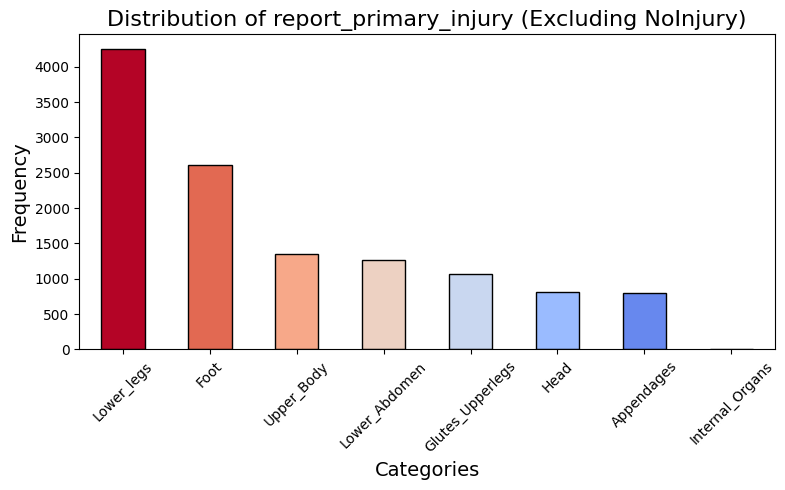

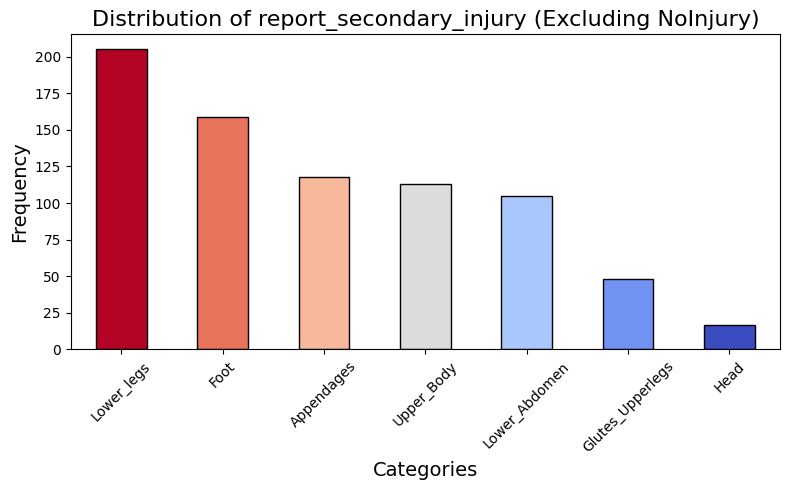

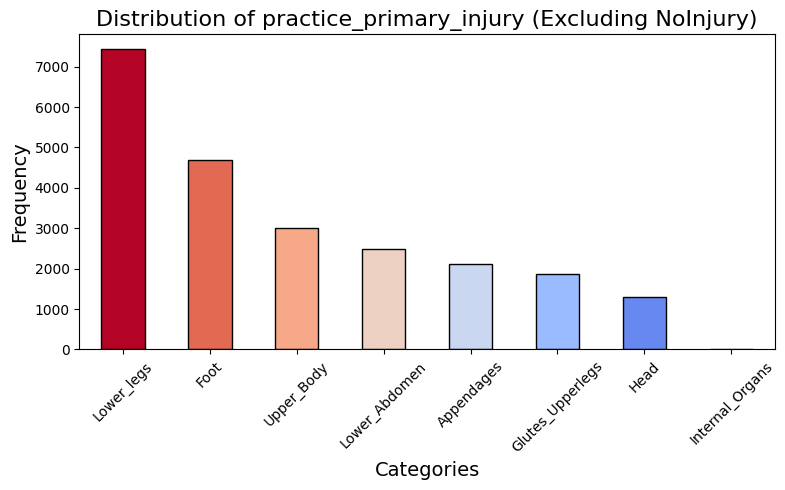

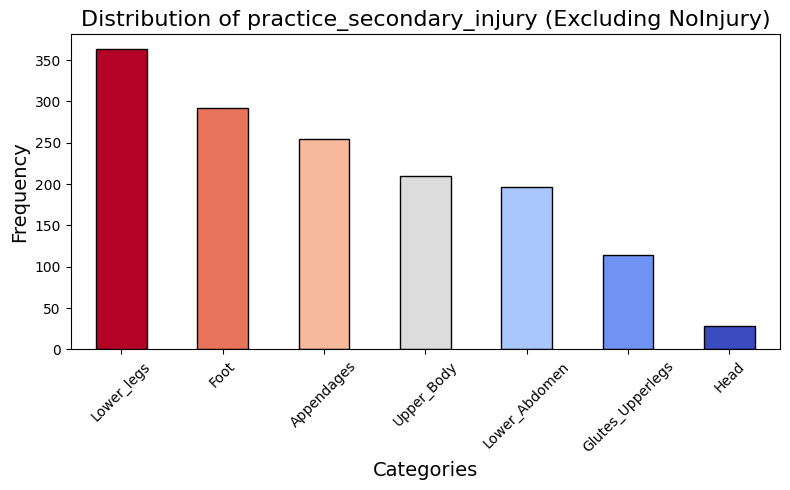

In [24]:
columns = ['report_primary_injury', 'report_secondary_injury', 'practice_primary_injury', 'practice_secondary_injury']

# Plot bar charts for each column excluding 'NoInjury'
for col in columns:
    plt.figure(figsize=(8, 5))
    
    # Exclude 'NoInjury' and count remaining categories
    filtered_counts = df[col].value_counts().drop(labels=['NoInjury'], errors='ignore')
    
    # Generate colors using a colormap (e.g., coolwarm) in reverse order
    
    cmap = plt.cm.coolwarm
    colors = cmap(np.linspace(1, 0, len(filtered_counts)))  # Reverse the order
    
    # Plot the bar chart
    filtered_counts.plot(kind='bar', color=colors, edgecolor='black')
    plt.title(f'Distribution of {col} (Excluding NoInjury)', fontsize=16)
    plt.xlabel('Categories', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Injury counts by turf type

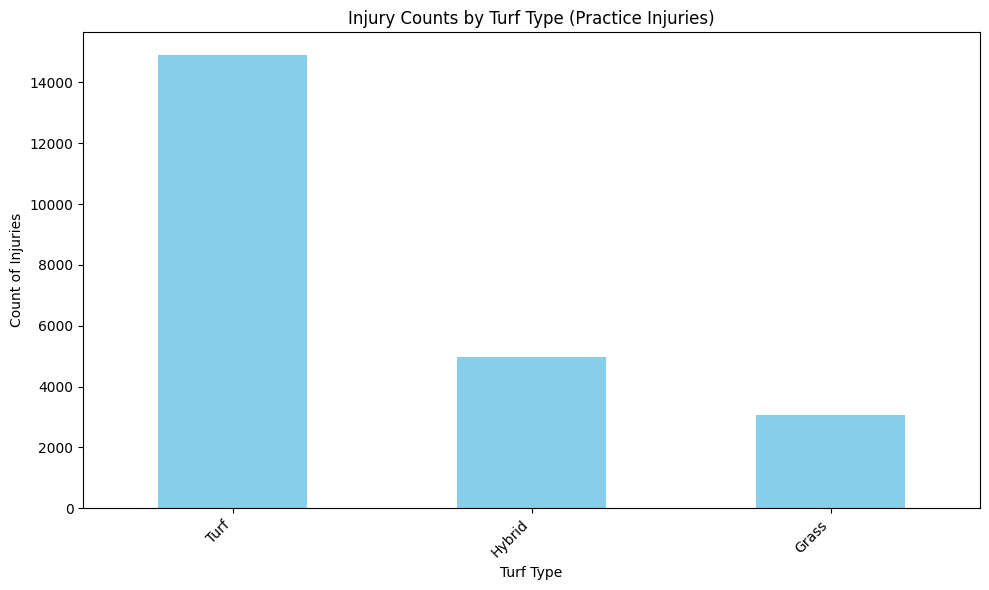

In [25]:
practice_injury_columns = ['practice_primary_injury', 'practice_secondary_injury']
turf_column = 'surface_type'

# Filtered rows where practice injuries are not 'NoInjury'

df_injuries = df[~df[practice_injury_columns].isin(['NoInjury']).all(axis=1)]

# Counts the injuries based on turf type
turf_injury_counts = df_injuries[turf_column].value_counts()

# Plot the bar chart

plt.figure(figsize=(10, 6))
turf_injury_counts.plot(kind='bar', color='skyblue')
plt.title('Injury Counts by Turf Type (Practice Injuries)')
plt.xlabel('Turf Type')
plt.ylabel('Count of Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


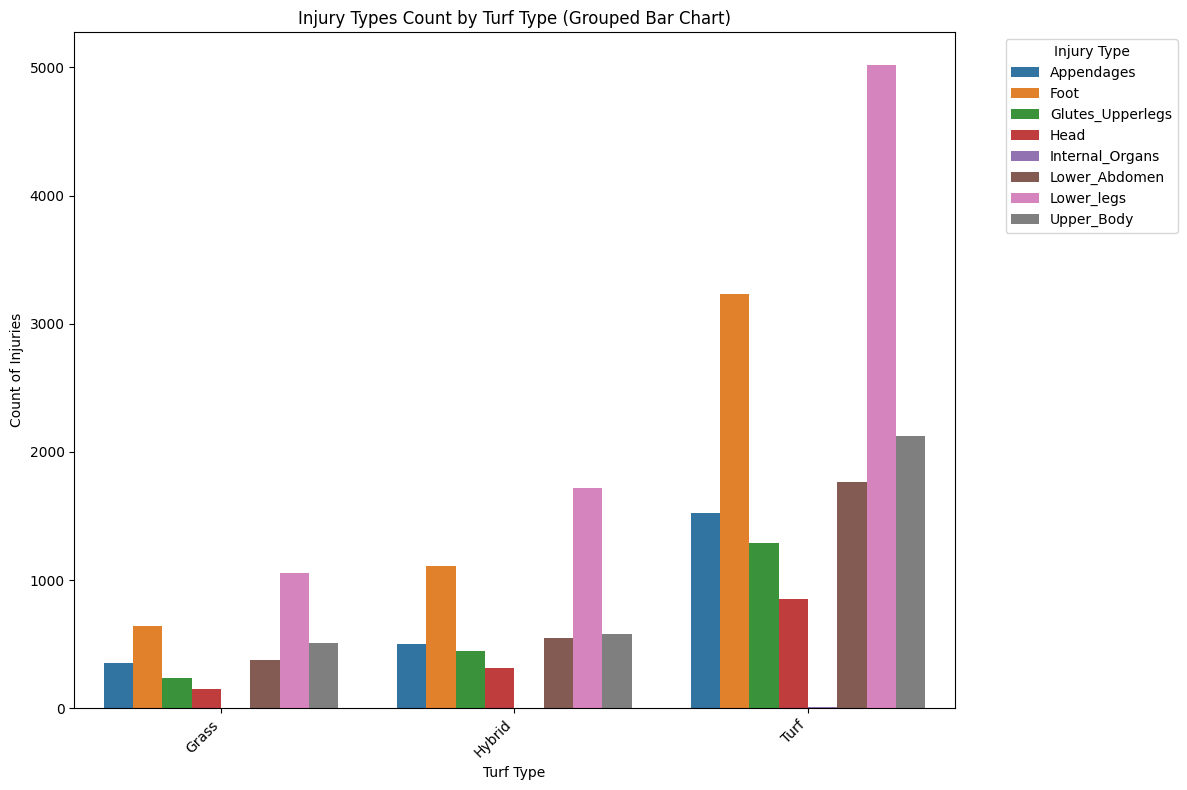

In [26]:
practice_injury_columns = ['practice_primary_injury', 'practice_secondary_injury']
turf_column = 'surface_type' 

# Filter rows where practice injuries are not 'NoInjury'

df_injuries = df[~(df[practice_injury_columns] == 'NoInjury').all(axis=1)]

# Melted the DataFrame to have a single injury column

df_melted = df_injuries.melt(id_vars=[turf_column], value_vars=practice_injury_columns, 
                             var_name='injury_type_source', value_name='injury_type')

# Remove rows where injury_type is 'NoInjury'

df_melted_filtered = df_melted[df_melted['injury_type'] != 'NoInjury']

# Group by turf type and injury type to get the counts

injury_counts = df_melted_filtered.groupby([turf_column, 'injury_type']).size().reset_index(name='count')

# Plot the grouped bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=injury_counts, x=turf_column, y='count', hue='injury_type')

# Plot the grouped chart
plt.title('Injury Types Count by Turf Type (Grouped Bar Chart)')
plt.xlabel('Turf Type')
plt.ylabel('Count of Injuries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
# Check the injury positions counts
injury_positions = df['position_y'].value_counts()
injury_positions

position_y
DB    5026
OL    4053
DL    3278
WR    3142
LB    2968
RB    1932
TE    1425
QB     823
K      166
P       95
LS      61
Name: count, dtype: int64

# Injury Occurrences by Position 

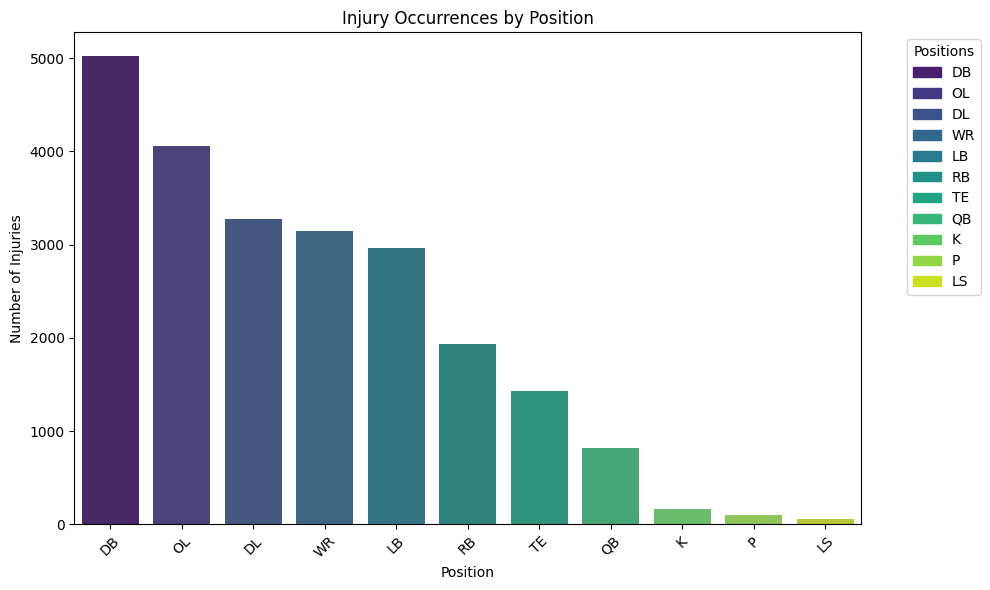

In [28]:
# Plot the injury occurrences by position using barplot

plt.figure(figsize=(10, 6))
sns.barplot(x=injury_positions.index, y=injury_positions.values, palette='viridis')
plt.title('Injury Occurrences by Position')
plt.xlabel('Position')
plt.ylabel('Number of Injuries')

# for legend
colors = sns.color_palette('viridis', len(injury_positions))
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(injury_positions))]
labels = injury_positions.index
plt.legend(handles, labels, title="Positions", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


In [29]:
# Create injury columns based on the practice and report injuries and primary and secondary 

injury_columns = ['practice_primary_injury', 'practice_secondary_injury','report_primary_injury', 'report_secondary_injury']

In [30]:
# Exclude rows where all injury_columns contain 'NoInjury'

filtered_df = df[~df[injury_columns].eq('NoInjury').all(axis=1)]

# Calculate team injury counts excluding 'NoInjury' entries
team_injury_counts = filtered_df['team'].value_counts()

In [31]:
# Injuries by teams

team_injury_counts = df['team'].value_counts()

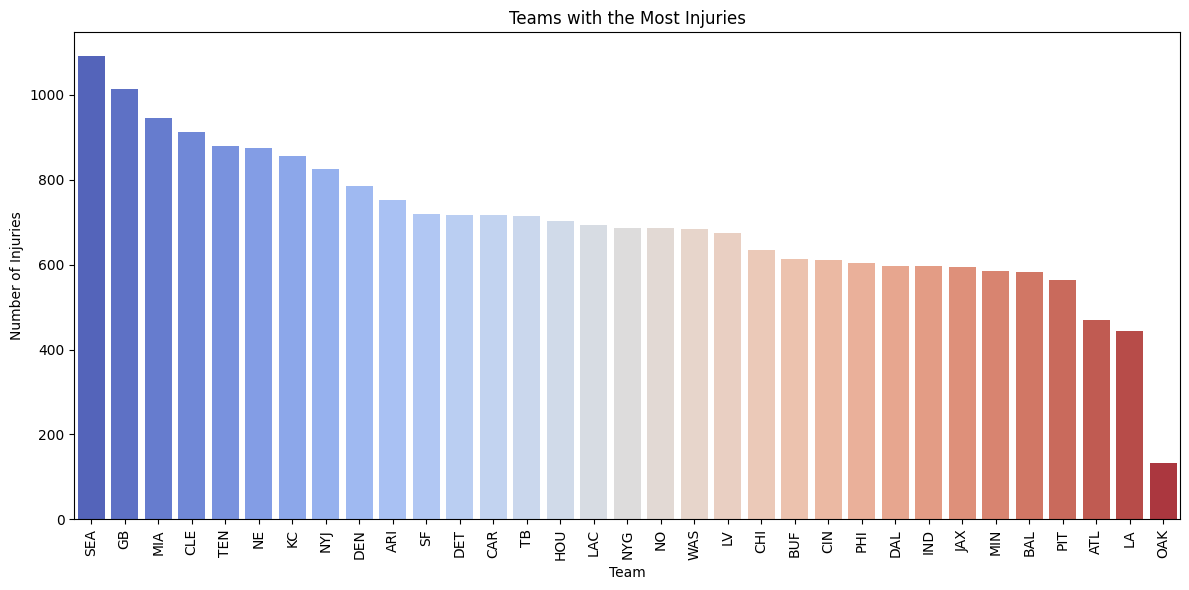

In [32]:
# Plot the injuries by teams

plt.figure(figsize=(12, 6))
sns.barplot(x=team_injury_counts.index, y=team_injury_counts.values, palette='coolwarm')
plt.title('Teams with the Most Injuries')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

In [33]:
# Filter rows where practice injuries are not 'NoInjury'

df_injuries = df[~df[injury_columns].isin(['NoInjury']).all(axis=1)]

# Count the injuries based on turf type

age_counts = df_injuries['age'].value_counts()

# Injury Occurrence by Age

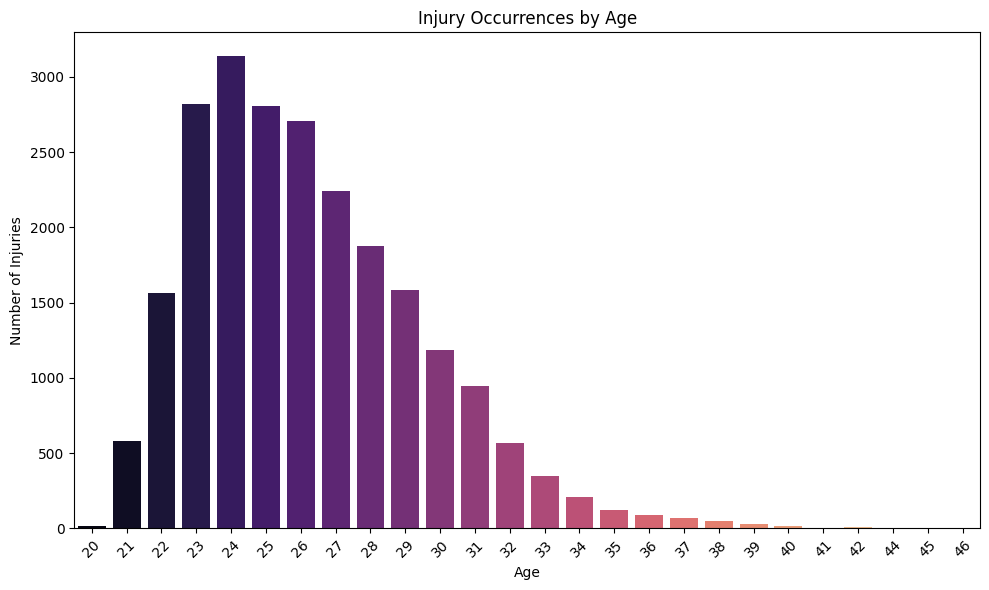

In [34]:
# Plot the chart for the injury occurrences by age

plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='magma')
plt.title('Injury Occurrences by Age')
plt.xlabel('Age')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)  # Rotate x labels at 45 degrees for better readability
plt.tight_layout()  # Adjust layout
plt.show()

# Injured Occurrence by Age Group

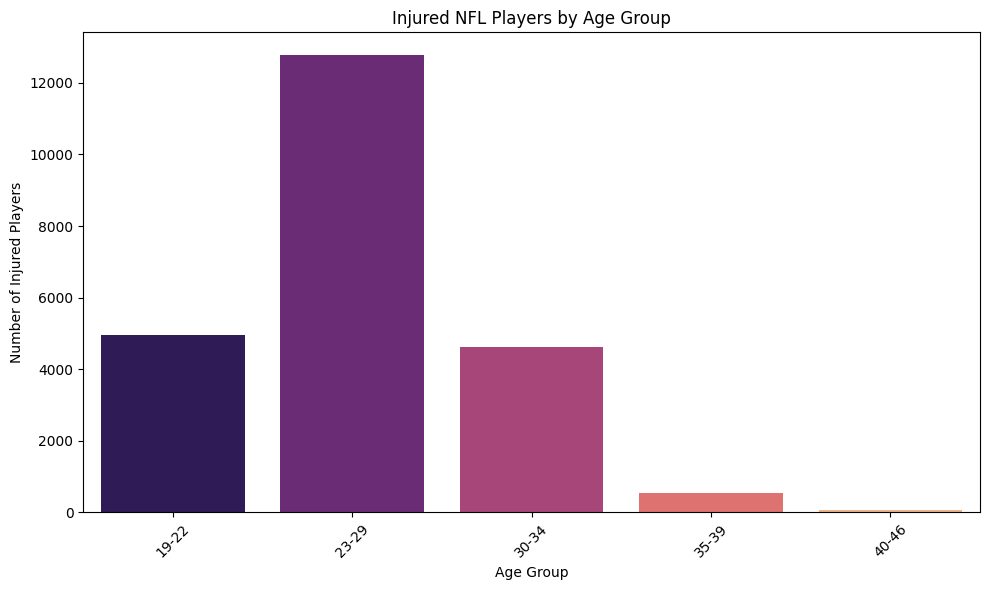

In [35]:
# Ages 23-29: This age range is often associated with peak physical performance, 
# but it can also see a high incidence of injuries due to the physical demands of the game
# and the accumulation of wear and tear.

# Define age bins and labels
bins = [19, 24, 29, 34, 39, 46]  # Adjusted to include age 19
labels = ['19-22', '23-29', '30-34', '35-39', '40-46']

# Creating a new column for age groups
# Filtering rows where practice injuries are not 'NoInjury'
df_injuries = df[~df[injury_columns].isin(['NoInjury']).all(axis=1)]
df['Age_Group'] = pd.cut(df_injuries['age'], bins=bins, labels=labels, right=False)

# Count players in each age group
age_counts2 = df['Age_Group'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts2.index, y=age_counts2.values, palette='magma')
plt.title('Injured NFL Players by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Injured Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Injured Occurrence by Body Mass Index (BMI)

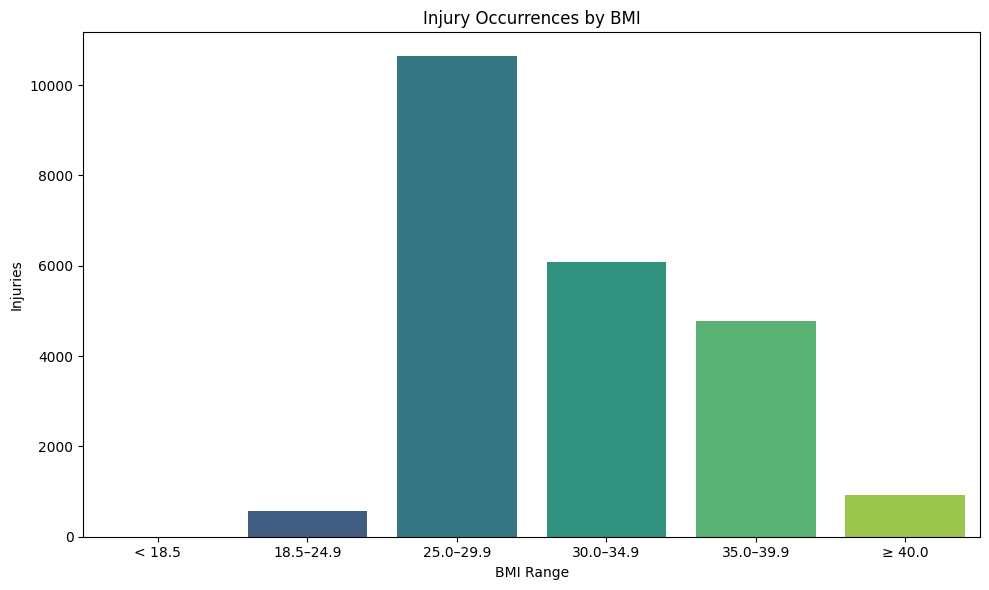

In [36]:

# Defined BMI bins and labels to get the injury occurrences by BMI

bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 50]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']

# Created a new column for BMI categories
df_injuries['BMI_Category'] = pd.cut(df_injuries['BMI'], bins=bins, labels=labels, right=False)

# Counts players in each BMI category
bmi_counts = df_injuries['BMI_Category'].value_counts().sort_index()

# Create a dataframe for plotting with ranges

bmi_ranges = pd.DataFrame({
    'Category': labels,
    'Range': ['< 18.5', '18.5–24.9', '25.0–29.9', '30.0–34.9', '35.0–39.9', '≥ 40.0'],
    'Count': bmi_counts.values
})

# Plot the injury occurrences by BMI

plt.figure(figsize=(10, 6))
sns.barplot(x='Range', y='Count', data=bmi_ranges, palette='viridis')
plt.title('Injury Occurrences by BMI')
plt.xlabel('BMI Range')
plt.ylabel('Injuries')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [37]:
# Injury counts by season

season_counts = df_injuries['season'].value_counts()
season_counts

season
2023    4702
2020    4655
2019    4611
2021    4513
2022    4488
Name: count, dtype: int64

In [38]:
# Fill nan in report status with values
df['report_status'] = df['report_status'].fillna('Full-Participation')

# Overall Injury Trend in NFL from 2019 to 2023 Season (report primary inury)

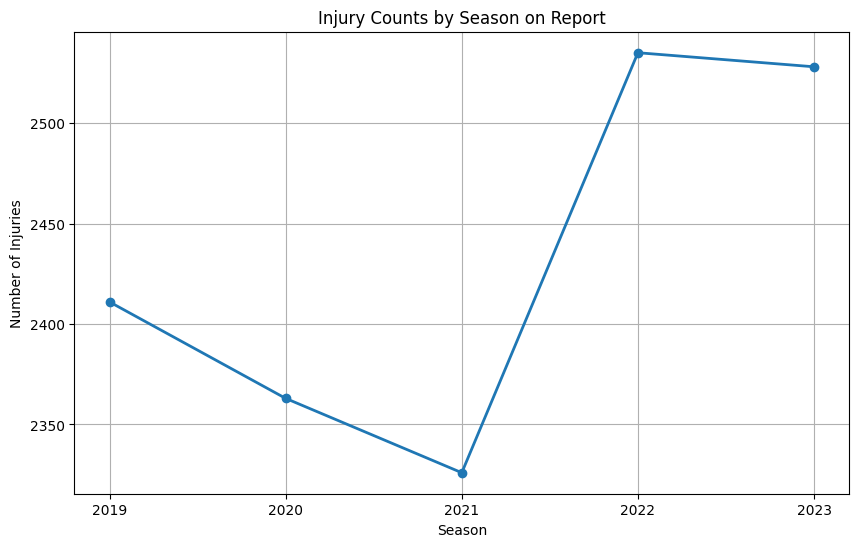

In [40]:
injury_counts_by_year_filtered = df[df['report_primary_injury'] != 'NoInjury'].groupby('season').size()
injury_counts_by_year_filtered

# Plotting the line chart with integer years on x-axis
plt.figure(figsize=(10, 6))
plt.plot(injury_counts_by_year_filtered.index.astype(int), injury_counts_by_year_filtered.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Season')
plt.ylabel('Number of Injuries')
plt.title('Injury Counts by Season on Report')
plt.xticks(injury_counts_by_year_filtered.index.astype(int))  # Ensuring years are integers on x-axis
plt.grid(True)
plt.show()

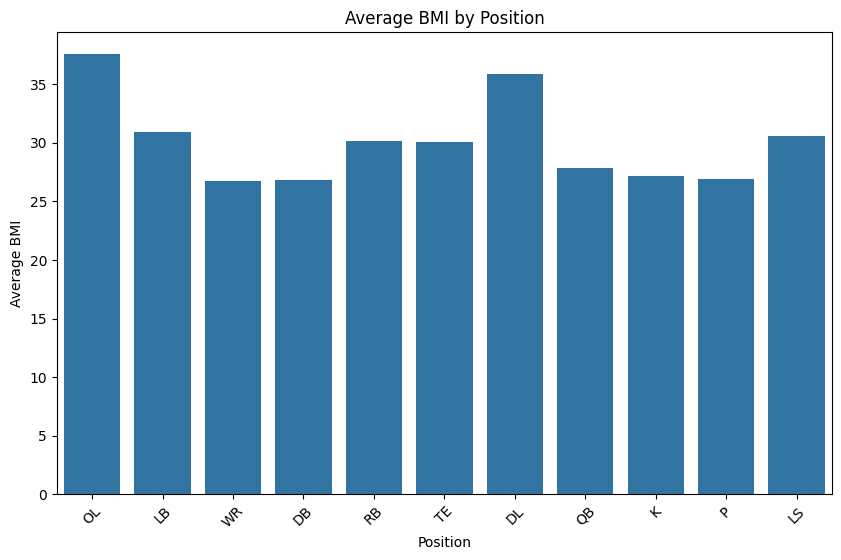

In [41]:
# Plot average BMI by position

plt.figure(figsize=(10, 6))
sns.barplot(x='position_y', y='BMI', data=df, estimator='mean', ci=None)
plt.title('Average BMI by Position')
plt.xlabel('Position')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.show()

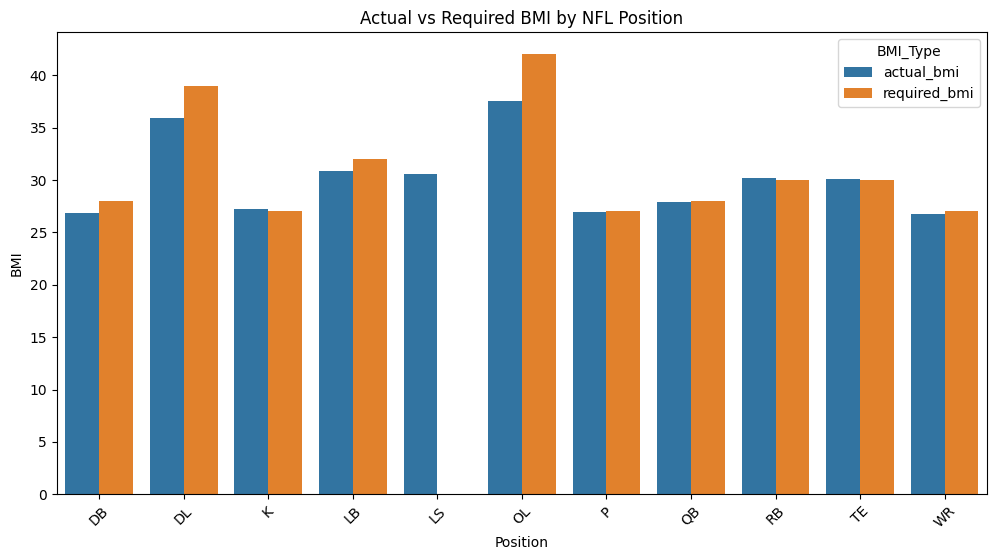

In [42]:
# dictionary with the required BMI for each NFL position

required_bmi = {
    'QB': 28,
    'RB': 30,
    'WR': 27,
    'LB': 32,
    'OL': 42,
    'DL': 39,
    'TE': 30,
    'DB': 28,
    'K': 27,
    'P':27
}

# Add required BMI column to the dataframe based on position_y

df['required_bmi'] = df['position_y'].map(required_bmi)

# Create a new dataframe to store actual average BMI and required BMI

bmi_comparison = df.groupby('position_y')['BMI'].mean().reset_index()
bmi_comparison.rename(columns={'BMI': 'actual_bmi'}, inplace=True)  # Rename 'BMI' to 'actual_bmi'
bmi_comparison['required_bmi'] = bmi_comparison['position_y'].map(required_bmi)

# Melt the dataframe to have actual and required BMI in one column for grouped bar chart

bmi_melted = pd.melt(bmi_comparison, id_vars='position_y', value_vars=['actual_bmi', 'required_bmi'], 
                     var_name='BMI_Type', value_name='BMI_Value')


plt.figure(figsize=(12, 6))
sns.barplot(x='position_y', y='BMI_Value', hue='BMI_Type', data=bmi_melted)
plt.title('Actual vs Required BMI by NFL Position')
plt.xlabel('Position')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()


# Injury Reoccurrence

In [43]:
# Filter out 'NoInjury' from the dataset
df_filtered = df[df['report_primary_injury'] != 'NoInjury']

# Count occurrences of each injury type for each player
injury_count_per_player = df_filtered.groupby(['gsis_id', 'report_primary_injury']).size().reset_index(name='injury_count')

# Filter to find injuries that occurred more than once for a player (recurrent injuries)
recurrent_injuries = injury_count_per_player[injury_count_per_player['injury_count'] > 1]

# Calculate the number of players who had recurrent injuries for each injury type
recurrent_injury_counts = recurrent_injuries.groupby('report_primary_injury')['gsis_id'].nunique().reset_index(name='recurrent_player_count')

# Calculate the total number of players who suffered each injury (including non-recurrent cases)
total_injury_counts = df_filtered.groupby('report_primary_injury')['gsis_id'].nunique().reset_index(name='total_player_count')

# Merge the two dataframes to calculate the reoccurrence rate for each injury
injury_reoccurrence_rate = pd.merge(recurrent_injury_counts, total_injury_counts, on='report_primary_injury')

# Calculate the reoccurrence rate
injury_reoccurrence_rate['reoccurrence_rate'] = injury_reoccurrence_rate['recurrent_player_count'] / injury_reoccurrence_rate['total_player_count']

# Sort by the reoccurrence rate to find the most recurring injuries
injury_reoccurrence_rate = injury_reoccurrence_rate.sort_values(by='reoccurrence_rate', ascending=False)

injury_reoccurrence_rate

,report_primary_injury,recurrent_player_count,total_player_count,reoccurrence_rate
6,Lower_legs,910,1398,0.650930
4,Internal_Organs,3,5,0.600000
1,Foot,581,973,0.597122
2,Glutes_Upperlegs,261,487,0.535934
7,Upper_Body,321,636,0.504717
0,Appendages,190,392,0.484694
5,Lower_Abdomen,301,622,0.483923
3,Head,177,469,0.377399


# Injury reoccurrence rate in practice

In [44]:

# Count occurrences of each injury type for each player
injury_count_per_player = df.groupby(['gsis_id', 'practice_primary_injury']).size().reset_index(name='injury_count')

# Filter to find injuries that occurred more than once for a player (recurrent injuries)
recurrent_injuries = injury_count_per_player[injury_count_per_player['injury_count'] > 1]

# Calculate the number of players who had recurrent injuries for each injury type
recurrent_injury_counts = recurrent_injuries.groupby('practice_primary_injury')['gsis_id'].nunique().reset_index(name='recurrent_player_count')

# Calculate the total number of players who suffered each injury (including non-recurrent cases)
total_injury_counts = df.groupby('practice_primary_injury')['gsis_id'].nunique().reset_index(name='total_player_count')

# Merge the two dataframes to calculate the reoccurrence rate for each injury
injury_reoccurrence_rate = pd.merge(recurrent_injury_counts, total_injury_counts, on='practice_primary_injury')

# Calculate the reoccurrence rate
injury_reoccurrence_rate['reoccurrence_rate'] = injury_reoccurrence_rate['recurrent_player_count'] / injury_reoccurrence_rate['total_player_count']

# Sort by the reoccurrence rate to find the most recurring injuries
injury_reoccurrence_rate = injury_reoccurrence_rate.sort_values(by='reoccurrence_rate', ascending=False)

injury_reoccurrence_rate


,practice_primary_injury,recurrent_player_count,total_player_count,reoccurrence_rate
6,Lower_legs,1325,1806,0.733666
1,Foot,942,1393,0.676238
7,Upper_Body,665,1081,0.615171
5,Lower_Abdomen,573,983,0.582909
2,Glutes_Upperlegs,430,746,0.576408
3,Head,347,615,0.564228
0,Appendages,451,812,0.555419
4,Internal_Organs,3,6,0.500000


In [45]:
# Check the total player count by reoccurrence rate

total_player_count_sum = injury_reoccurrence_rate['total_player_count'].sum()

injury_reoccurrence_rate['percentage_of_total'] = (injury_reoccurrence_rate['total_player_count'] / total_player_count_sum) * 100
injury_reoccurrence_rate

,practice_primary_injury,recurrent_player_count,total_player_count,reoccurrence_rate,percentage_of_total
6,Lower_legs,1325,1806,0.733666,24.267670
1,Foot,942,1393,0.676238,18.718087
7,Upper_Body,665,1081,0.615171,14.525665
5,Lower_Abdomen,573,983,0.582909,13.208815
2,Glutes_Upperlegs,430,746,0.576408,10.024187
3,Head,347,615,0.564228,8.263908
0,Appendages,451,812,0.555419,10.911045
4,Internal_Organs,3,6,0.500000,0.080623


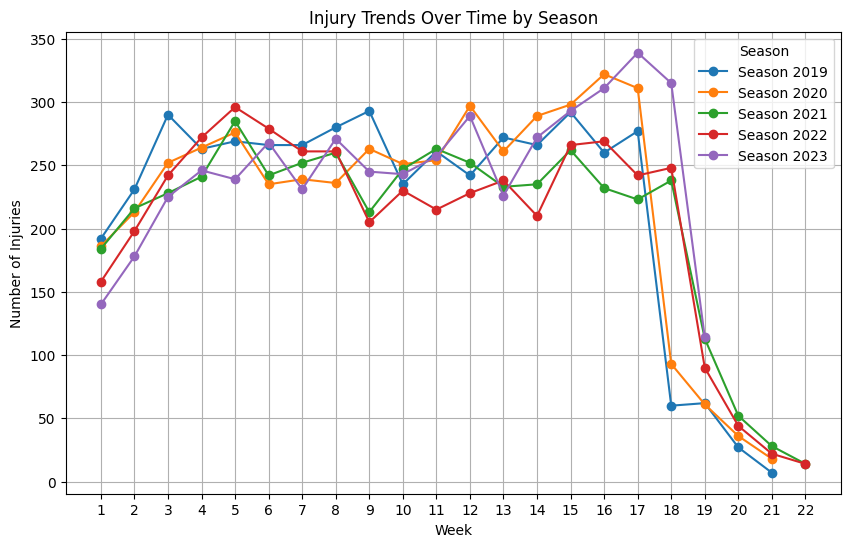

In [46]:
# Group by season and week to count the number of injuries reported in each combination

injury_trends = df.groupby(['season', 'week_x']).size().reset_index(name='injury_count')

# Plot the injury trends over time (season vs. weeks)
plt.figure(figsize=(10, 6))

for season in injury_trends['season'].unique():
    season_data = injury_trends[injury_trends['season'] == season]
    plt.plot(season_data['week_x'], season_data['injury_count'], marker='o', label=f'Season {season}')

# Add labels and title
plt.title('Injury Trends Over Time by Season')
plt.xlabel('Week')
plt.ylabel('Number of Injuries')
plt.legend(title="Season")
plt.grid(True)
plt.xticks(range(1, 23))  
plt.show()

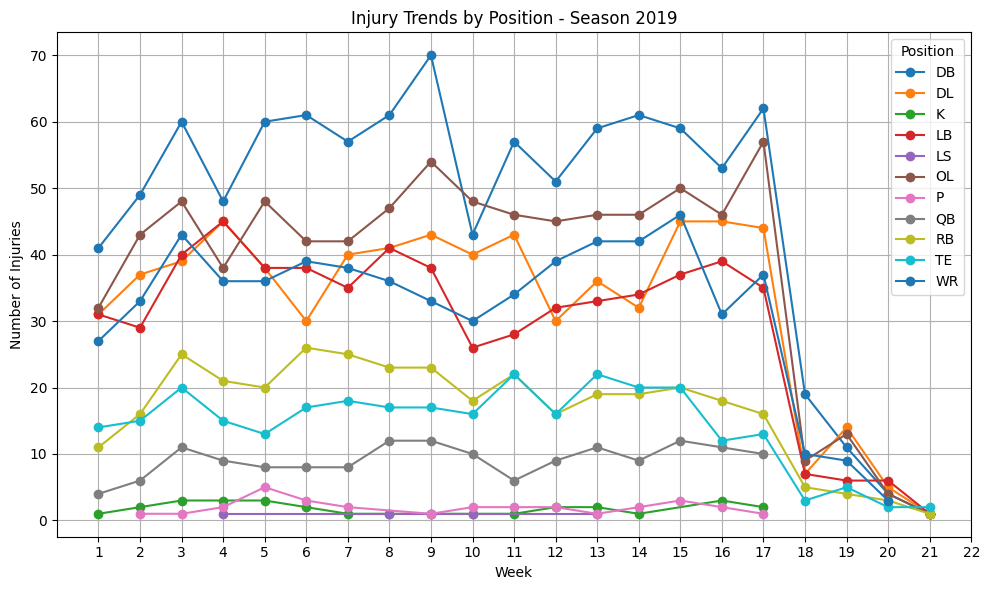

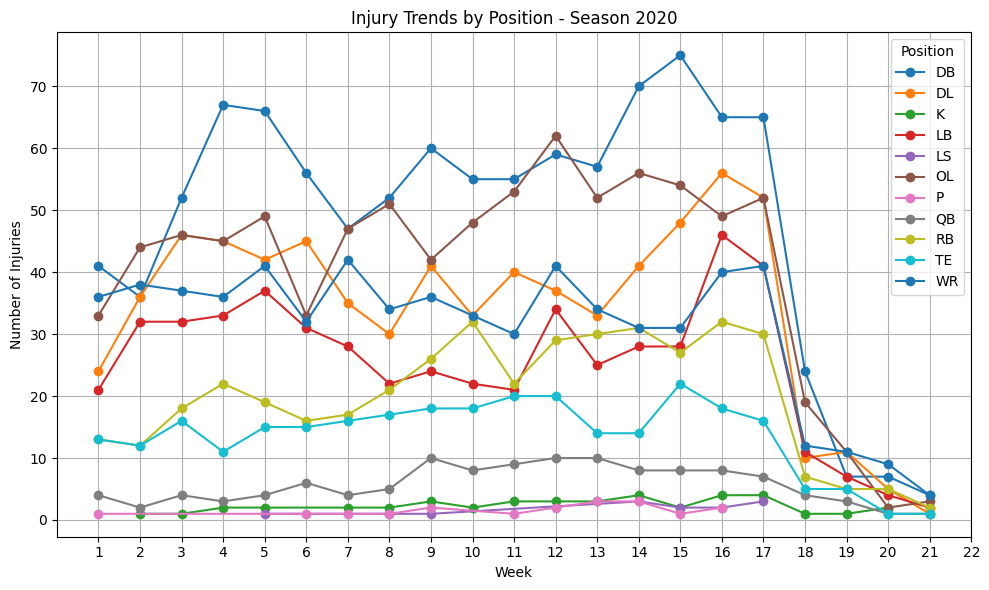

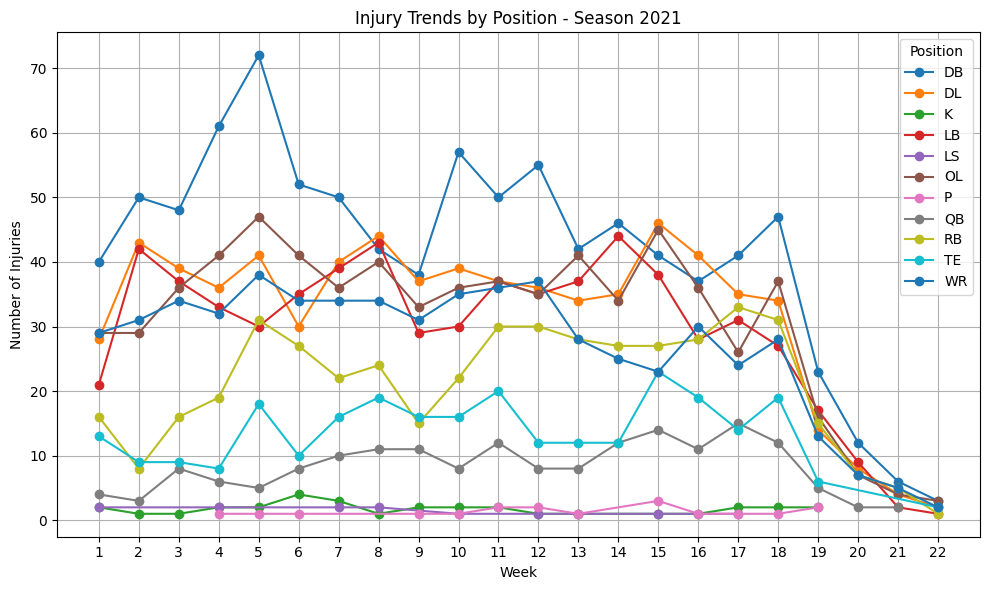

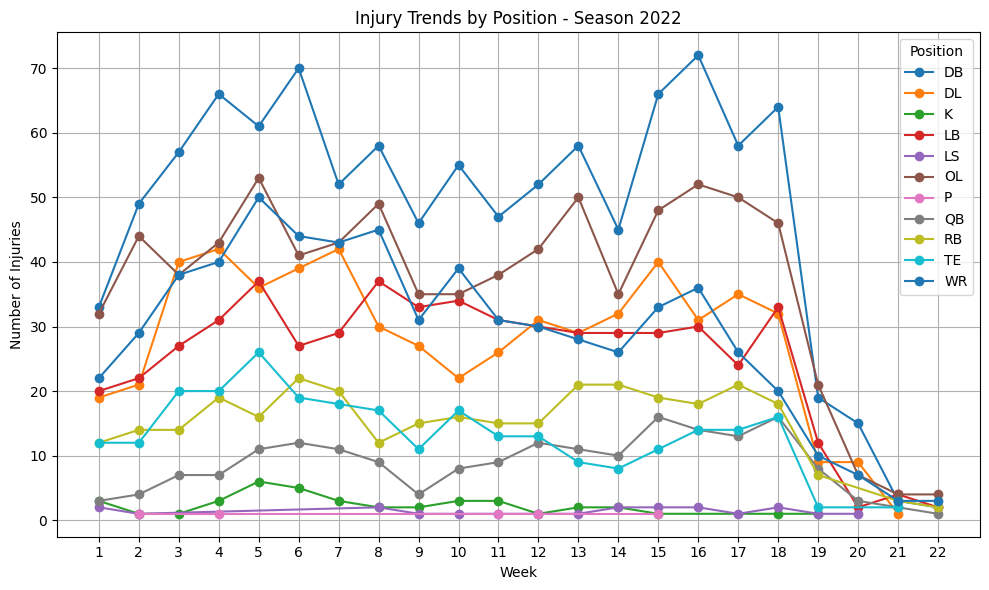

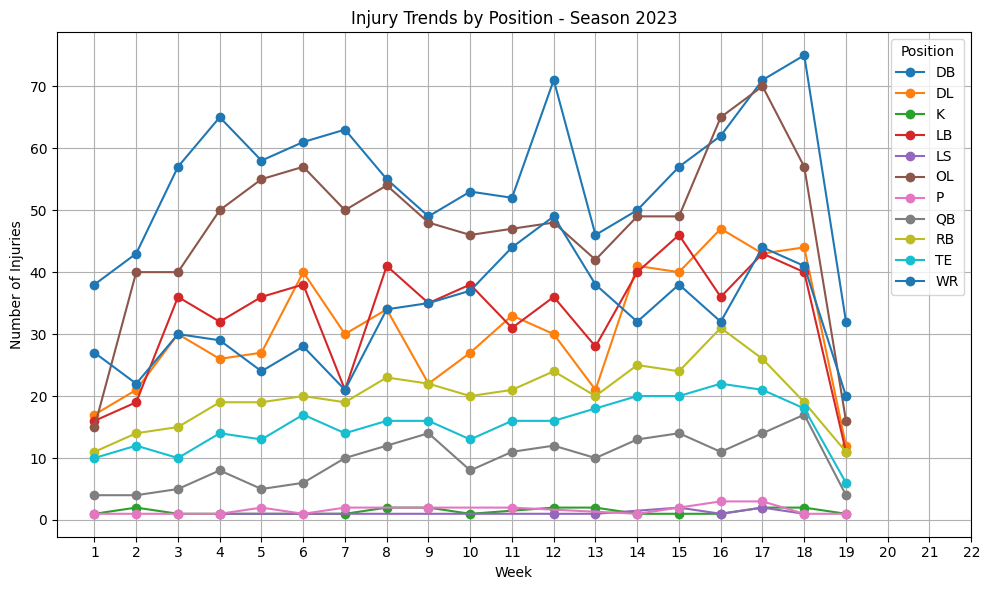

In [47]:
# Group by position, season, and week to count the number of injuries for each combination

injury_trends_by_position = df.groupby(['position_y', 'season', 'week_x']).size().reset_index(name='injury_count')

# List of seasons
seasons = sorted(injury_trends_by_position['season'].unique())

# Plot injury trends for each season, considering all positions
for season in seasons:
    plt.figure(figsize=(10, 6))
    
    season_data = injury_trends_by_position[injury_trends_by_position['season'] == season]
    positions = season_data['position_y'].unique()
    
    # Plot injury trends for each position in the current season
    for position in positions:
        position_data = season_data[season_data['position_y'] == position]
        plt.plot(position_data['week_x'], position_data['injury_count'], marker='o', label=f'{position}')
    
    # Add labels and title
    plt.title(f'Injury Trends by Position - Season {season}')
    plt.xlabel('Week')
    plt.ylabel('Number of Injuries')
    plt.grid(True)
    plt.legend(title="Position")
    plt.xticks(range(1, 23))  # Assuming 17 weeks in each season
    plt.tight_layout()
    
    # Show the plot for the current season
    plt.show()


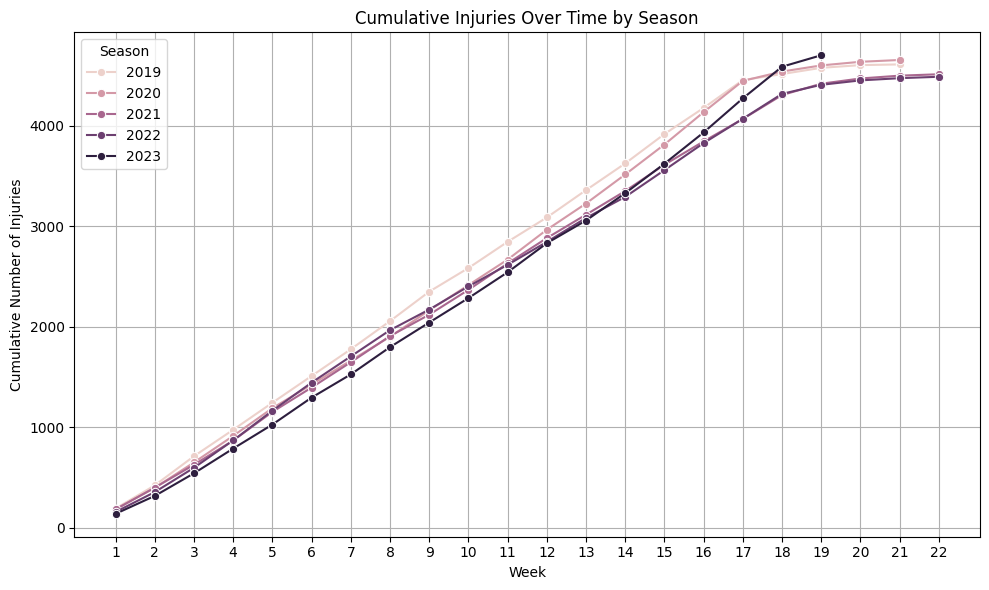

In [48]:
# Group by season and week to count the number of injuries reported in each combination

injury_weekly = df.groupby(['season', 'week_x']).size().reset_index(name='injury_count')

# Calculate the cumulative sum of injuries for each season
injury_weekly['cumulative_injuries'] = injury_weekly.groupby('season')['injury_count'].cumsum()

# Plot cumulative injuries over weeks for each season
plt.figure(figsize=(10, 6))

sns.lineplot(data=injury_weekly, x='week_x', y='cumulative_injuries', hue='season', marker="o")

# Add labels and title
plt.title('Cumulative Injuries Over Time by Season')
plt.xlabel('Week')
plt.ylabel('Cumulative Number of Injuries')
plt.grid(True)
plt.xticks(range(1, 23))  # Assuming 17 weeks in each season
plt.legend(title="Season")
plt.tight_layout()

# Show the plot
plt.show()

## Which injuries are commonly associated with specific player positions?

In [49]:
#Filter out 'NoInjury' from the data

df_filtered = df[df['report_primary_injury'] != 'NoInjury']

# Group by player position and injury type, and count occurrences
injury_position_counts = df_filtered.groupby(['position_y', 'report_primary_injury']).size().reset_index(name='Count')

# Sort the results to show the most common injuries per position
injury_position_counts = injury_position_counts.sort_values(by=['position_y', 'Count'], ascending=[True, False])

injury_position_counts

,position_y,report_primary_injury,Count
6,DB,Lower_legs,1016
1,DB,Foot,529
2,DB,Glutes_Upperlegs,343
7,DB,Upper_Body,325
5,DB,Lower_Abdomen,267
...,...,...,...
71,WR,Lower_Abdomen,174
69,WR,Glutes_Upperlegs,159
73,WR,Upper_Body,158
70,WR,Head,144


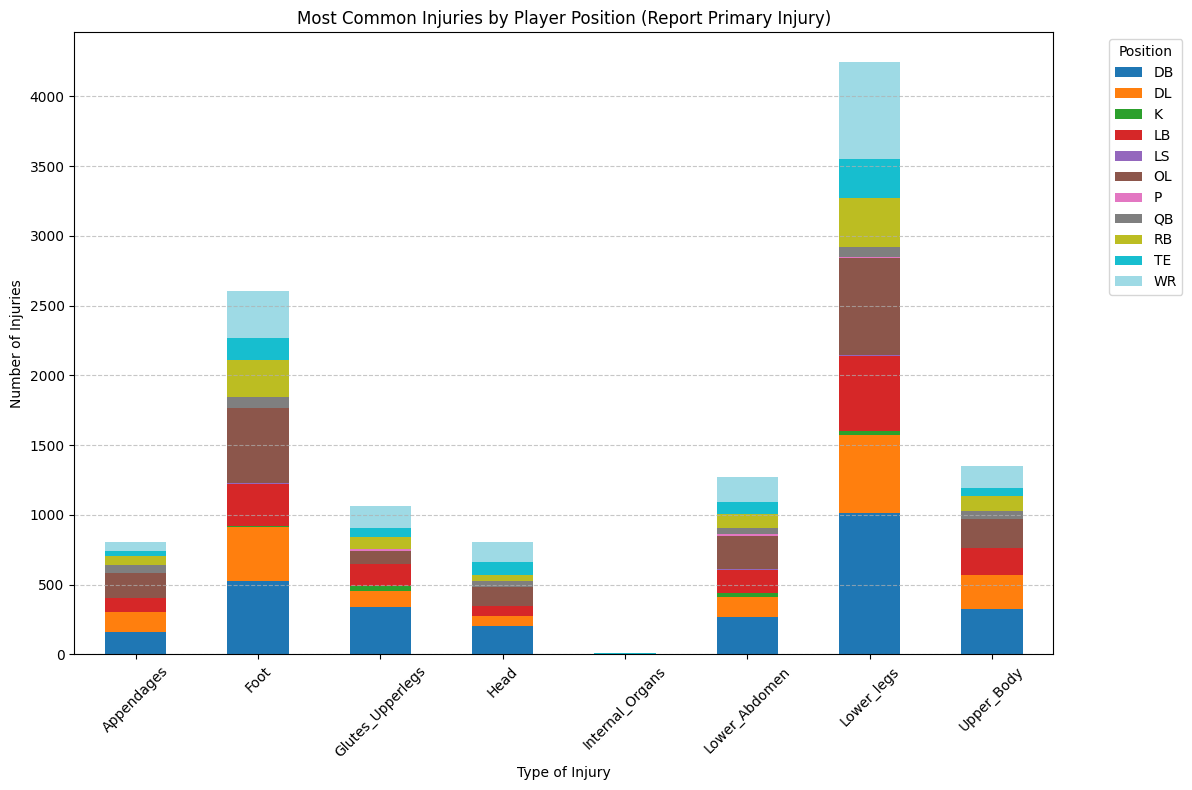

In [50]:
pivot_df = injury_position_counts.pivot(index='report_primary_injury', columns='position_y', values='Count').fillna(0)

# Define a colormap for unique colors for each position

positions = pivot_df.columns
num_positions = len(positions)
cmap = plt.cm.get_cmap('tab20', num_positions)  # Use 'tab20' or any other suitable colormap
colors = [cmap(i) for i in range(num_positions)]

# Plotting a stacked bar chart with unique colors
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

# Customize the plot
plt.xlabel('Type of Injury')
plt.ylabel('Number of Injuries')
plt.title('Most Common Injuries by Player Position (Report Primary Injury)')
plt.xticks(rotation=45)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left', labels=positions)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
# Filter out rows where report_primary_injury is 'NoInjury'

filtered_df = df[df['report_primary_injury'] != 'NoInjury']

# Group by Age_Group and report_primary_injury, and calculate the size
age_group_injuries = filtered_df.groupby(['Age_Group', 'report_primary_injury']).size().unstack(fill_value=0)

# Sum the injuries for each age group
age_group_injuries_sum = age_group_injuries.sum(axis=1)

# Print the results
print(age_group_injuries_sum)

Age_Group
19-22    2631
23-29    6692
30-34    2543
35-39     272
40-46      24
dtype: int64


In [52]:
# Most prevalent injuries in the NFL

prevalent_injuries = df['report_primary_injury'].value_counts().head(8)
print(prevalent_injuries)

report_primary_injury
NoInjury            10806
Lower_legs           4247
Foot                 2608
Upper_Body           1354
Lower_Abdomen        1270
Glutes_Upperlegs     1064
Head                  806
Appendages            805
Name: count, dtype: int64


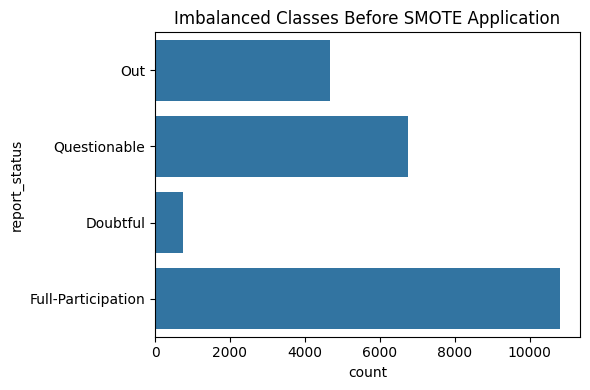

In [53]:
# Imbalanced data classes before SMOTE

plt.figure(figsize=(6, 4))
sns.countplot(y='report_status', data=df)
plt.title('Imbalanced Classes Before SMOTE Application')
plt.tight_layout()
plt.show()

# Predictive Factors Analysis 

In [54]:
# We will use Multiple Regression Analysis for our predictive factor analysis to quantify 
# the relationships between the target (report status ) and other predictors as shown below
df

,season,game_type_x,team,week_x,gsis_id,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,...,height,weight,college,years_exp,rookie_year,surface_type,age,BMI,Age_Group,required_bmi
0,2019,REG,ARI,1,00-0035536,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,...,75,305,Georgia,0,2019,Turf,23,38.121964,19-22,42.0
1,2019,REG,ARI,1,00-0028001,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,...,78,330,Florida,8,2011,Turf,31,38.134907,30-34,42.0
2,2019,REG,ARI,1,00-0033875,Lower_legs,NoInjury,Questionable,Lower_legs,NoInjury,...,73,235,Temple,2,2017,Turf,24,31.004169,23-29,32.0
3,2019,REG,ARI,1,00-0034490,Appendages,NoInjury,Questionable,Appendages,NoInjury,...,74,214,Washington,1,2018,Turf,23,27.475670,19-22,32.0
4,2019,REG,ATL,1,00-0034140,Lower_Abdomen,NoInjury,Out,Lower_Abdomen,NoInjury,...,76,305,Wesley,1,2018,Turf,23,37.125354,19-22,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24481,2023,WC,PIT,19,00-0033886,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,...,76,252,Wisconsin,6,2017,Hybrid,28,30.674063,23-29,32.0
24483,2023,WC,TB,19,00-0037627,Lower_legs,NoInjury,Out,Lower_legs,NoInjury,...,75,285,James Madison,1,2022,Turf,24,35.622163,23-29,39.0
24484,2023,WC,TB,19,00-0036643,Lower_legs,NoInjury,Questionable,Lower_legs,NoInjury,...,72,228,Auburn,2,2021,Turf,24,30.922016,23-29,32.0
24485,2023,WC,TB,19,00-0039051,Glutes_Upperlegs,Lower_legs,Questionable,Glutes_Upperlegs,Lower_legs,...,71,189,Kansas State,0,2023,Turf,24,26.359858,23-29,28.0


In [55]:
df['report_status']

0                 Out
1                 Out
2        Questionable
3        Questionable
4                 Out
             ...     
24481             Out
24483             Out
24484    Questionable
24485    Questionable
24486    Questionable
Name: report_status, Length: 22969, dtype: object

In [56]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select the relevant features to predict the report_status
features =  ['season','game_type_x','team','report_primary_injury','position_y','surface_type','practice_primary_injury','week_x',
             'age','BMI','height','weight','years_exp']
target = 'report_status'

encoder = LabelEncoder()
df['position_y'] = encoder.fit_transform(df['position_y'])
df['Season'] = encoder.fit_transform(df['season'])
df['game_type_x'] = encoder.fit_transform(df['game_type_x'])
df['team'] = encoder.fit_transform(df['team'])
#df['report_status'] = encoder.fit_transform(df['report_status'])
df['practice_primary_injury'] = encoder.fit_transform(df['practice_primary_injury'])
df['week_x'] = encoder.fit_transform(df['week_x'])
df['surface_type'] = encoder.fit_transform(df['surface_type'])
df['report_primary_injury'] = encoder.fit_transform(df['report_primary_injury'])

# Define X (features) and y (target)
X = df[features]


# Map report_status to binary (1 for "Out" and "Doubtful", 0 for "Full Participation and "Questionable")

df['report_status_binary'] = df['report_status'].map({
    "Out": 1,
    "Questionable": 0,
    "Doubtful": 1,
    "Full participation": 0
})
# Fill NaN values with a default category (e.g., 0 for "Not Out")

df['report_status_binary'] = df['report_status_binary'].fillna(0)

# Check the result
print(df['report_status_binary'].value_counts())

report_status_binary
0.0    17554
1.0     5415
Name: count, dtype: int64


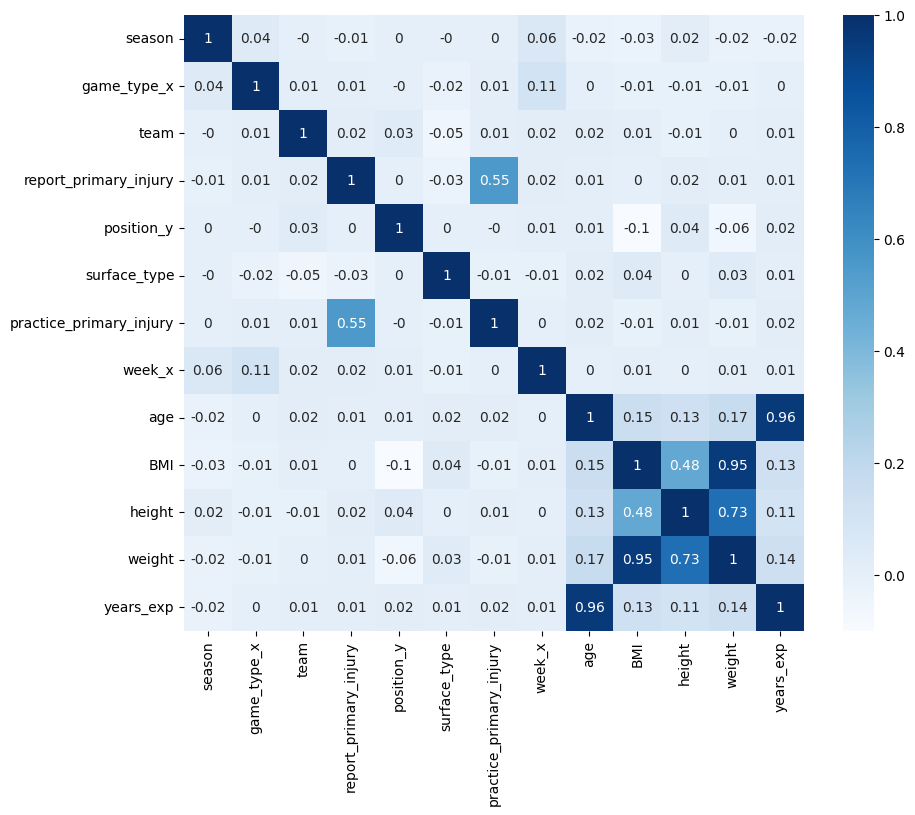

In [57]:
# Heatmap for the selected variables or features for the model

# We will remove the one of any features with very strong correlation to avoid multicollinearity in our model

# To reduce standard errors and increase the predictive power of our model

plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr().round(2),annot=True,cmap="Blues",annot_kws={"fontsize":10})
plt.show()

In [58]:
# We will remove the one of any features with very strong correlation to avoid multicollinearity in our model
# To reduce standard errors and increase the predictive power of our model
# Age and years of experience are very strongly correlated
# Weight and BMI are very strongly correlated
# Height and Weight are very strongly correlated

features =  ['season','game_type_x','team','report_primary_injury','position_y','surface_type','practice_primary_injury','week_x',
             'age','BMI']
target = 'report_status'

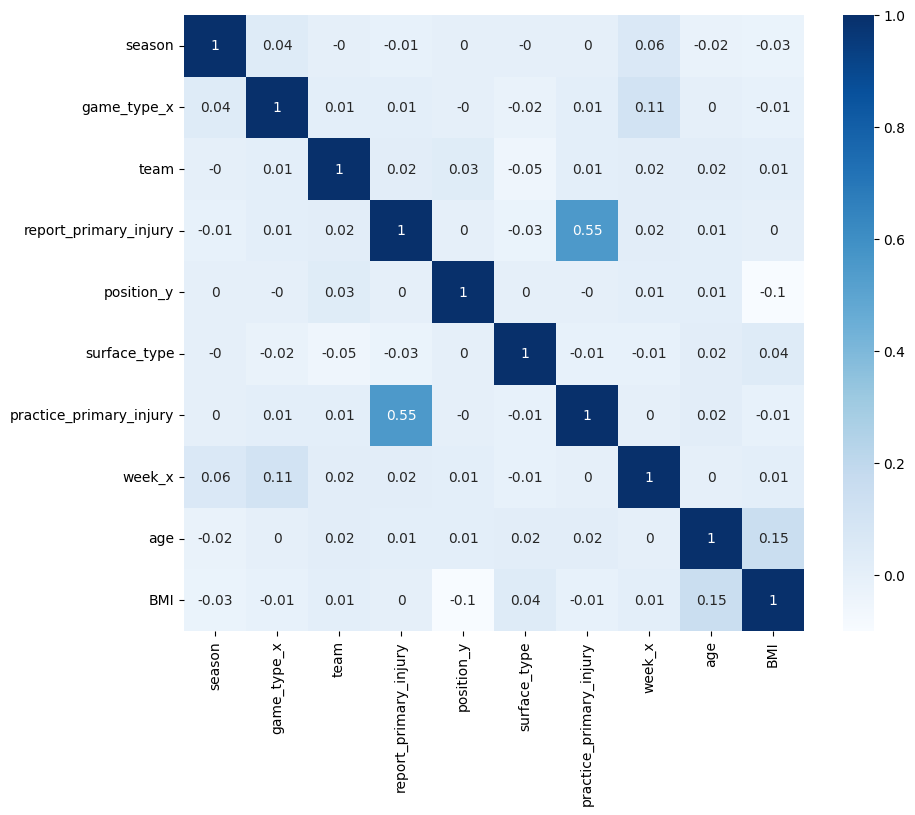

In [59]:
# Heatmap for the variables

plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr().round(2),annot=True,cmap="Blues",annot_kws={"fontsize":10})
plt.show()

In [60]:
# Define X (features) and y (target)
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print(y.unique())

['Out' 'Questionable' 'Doubtful' 'Full-Participation']


In [62]:
# Convert categorical variable to binary (1 for "Out", 0 for others)
y = df['report_status'].map({
    "Out": 1,
    "Questionable": 0,
    "Doubtful": 1,
    "Full participation": 0
}).fillna(0)  # Fill NaN values with 0 (or another default)
y

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
24481    1.0
24483    1.0
24484    0.0
24485    0.0
24486    0.0
Name: report_status, Length: 22969, dtype: float64

In [63]:
# Fill missing values in y
# This is just a double check even though we dont have any mising values
y = y.fillna(0)

In [64]:
y

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
24481    1.0
24483    1.0
24484    0.0
24485    0.0
24486    0.0
Name: report_status, Length: 22969, dtype: float64

# Statsmodel Logit Regression

In [65]:
import statsmodels.api as sm

# Assuming you have your data in X (features) and y (target)
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y, X).fit()

# Display the summary of the logistic regression results
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.444730
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          report_status   No. Observations:                22969
Model:                          Logit   Df Residuals:                    22958
Method:                           MLE   Df Model:                           10
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                  0.1857
Time:                        19:10:52   Log-Likelihood:                -10215.
converged:                       True   LL-Null:                       -12544.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.2739     24.386      0.544      0.586     -34.522   

In [66]:
#pip install imblearn

# Data Splitting and SMOTE Application

In [67]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the number of samples in each class after applying SMOTE
print("Original training data class distribution:", pd.Series(y_train).value_counts())
print("Resampled training data class distribution:", pd.Series(y_train_resampled).value_counts())

import statsmodels.api as sm

# Add a constant to the features for the intercept

X_train_resampled = sm.add_constant(X_train_resampled)
logit_model = sm.Logit(y_train_resampled, X_train_resampled).fit()
print(logit_model.summary())


Original training data class distribution: report_status
0.0    14047
1.0     4328
Name: count, dtype: int64
Resampled training data class distribution: report_status
0.0    14047
1.0    14047
Name: count, dtype: int64
Optimization terminated successfully.
         Current function value: 0.519347
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          report_status   No. Observations:                28094
Model:                          Logit   Df Residuals:                    28083
Method:                           MLE   Df Model:                           10
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                  0.2507
Time:                        19:10:52   Log-Likelihood:                -14591.
converged:                       True   LL-Null:                       -19473.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err  

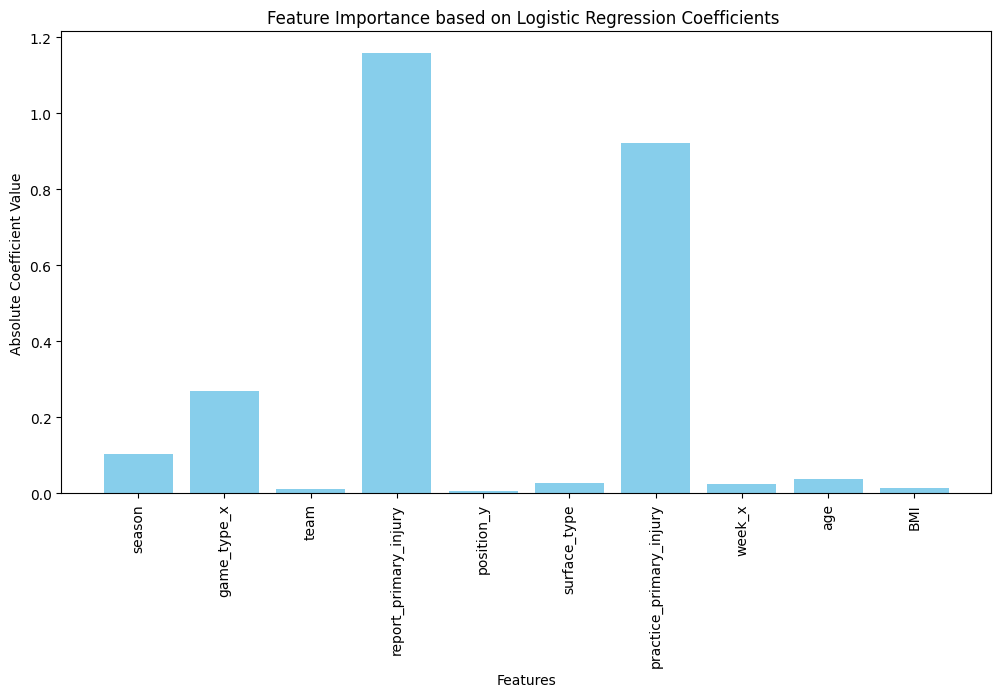

In [68]:
# Feature names and their corresponding coefficients
features = [
    'season', 'game_type_x', 'team', 'report_primary_injury', 'position_y',
    'surface_type', 'practice_primary_injury', 'week_x', 'age', 'BMI'
]
coefficients = [-0.1030, -0.2688, 0.0118, -1.1572, -0.0069, -0.0277, 0.9227, -0.0247, -0.0387, -0.0129]

# Get the absolute values of the coefficients for feature importance

importance = np.abs(coefficients)

# Plot the vertical bar chart

plt.figure(figsize=(12, 6))
plt.bar(features, importance, color='skyblue')
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Features')
plt.title('Feature Importance based on Logistic Regression Coefficients ')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


# Function for Model performance

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
def metricsandconfusionmatrix (y_test,y_pred,modelname):
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # evaluation metrics
    print(f"{modelname} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Out', 'Out'], yticklabels=['Not Out', 'Out'])
    plt.title(f'Confusion Matrix for {modelname}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Logistic Regression

Logistic Regression Model Evaluation:
Accuracy: 0.6596
Precision: 0.3902
Recall: 0.7801
F1-Score: 0.5202

Confusion Matrix:
[[2182 1325]
 [ 239  848]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.62      0.74      3507
         1.0       0.39      0.78      0.52      1087

    accuracy                           0.66      4594
   macro avg       0.65      0.70      0.63      4594
weighted avg       0.78      0.66      0.69      4594



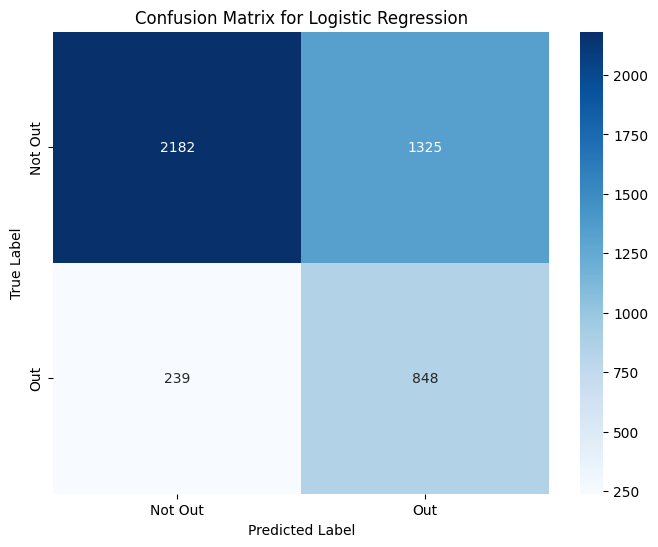

In [70]:
# Add a constant to the test data for the intercept
X_test = sm.add_constant(X_test)

# predictions on the test set
y_pred_prob = logit_model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_prob]  # Use 0.5 as the threshold

metricsandconfusionmatrix (y_test,y_pred,"Logistic Regression")

# Random Forest Classifier

Random Forest Classifier Model Evaluation:
Accuracy: 0.8037
Precision: 0.5672
Recall: 0.7185
F1-Score: 0.6339

Confusion Matrix:
[[2911  596]
 [ 306  781]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.87      3507
         1.0       0.57      0.72      0.63      1087

    accuracy                           0.80      4594
   macro avg       0.74      0.77      0.75      4594
weighted avg       0.82      0.80      0.81      4594



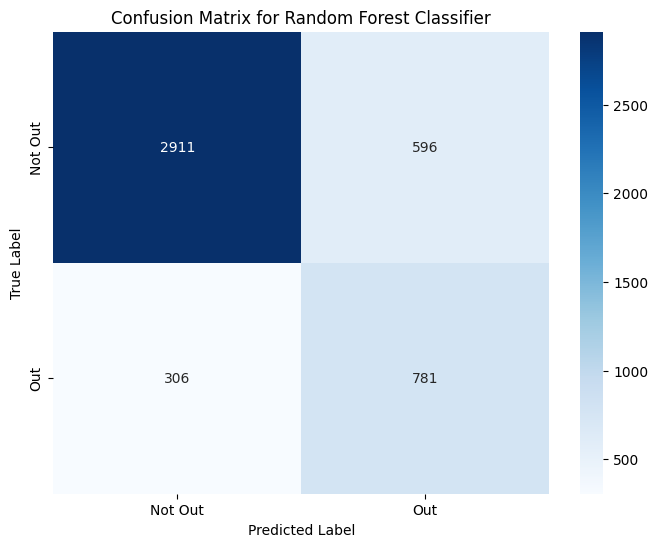

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# predictions on the test set
y_pred_rf = rf_model.predict(X_test)

metricsandconfusionmatrix (y_test,y_pred_rf,"Random Forest Classifier")

# Decision Tree Classifier

Decision Tree Classifier Model Evaluation:
Accuracy: 0.7534
Precision: 0.4879
Recall: 0.8537
F1-Score: 0.6209

Confusion Matrix:
[[2533  974]
 [ 159  928]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82      3507
         1.0       0.49      0.85      0.62      1087

    accuracy                           0.75      4594
   macro avg       0.71      0.79      0.72      4594
weighted avg       0.83      0.75      0.77      4594



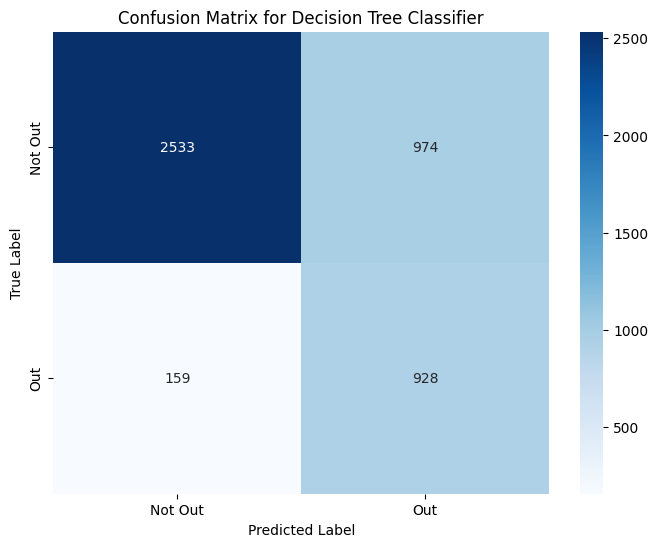

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)
dt_model.fit(X_train_resampled, y_train_resampled)

# predictions on the test set
y_pred_dt = dt_model.predict(X_test)

metricsandconfusionmatrix (y_test,y_pred_dt,"Decision Tree Classifier")

# XGBoost Classifier

XGBoost Classifier Model Evaluation:
Accuracy: 0.7906
Precision: 0.5387
Recall: 0.8013
F1-Score: 0.6442

Confusion Matrix:
[[2761  746]
 [ 216  871]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      3507
         1.0       0.54      0.80      0.64      1087

    accuracy                           0.79      4594
   macro avg       0.73      0.79      0.75      4594
weighted avg       0.84      0.79      0.80      4594



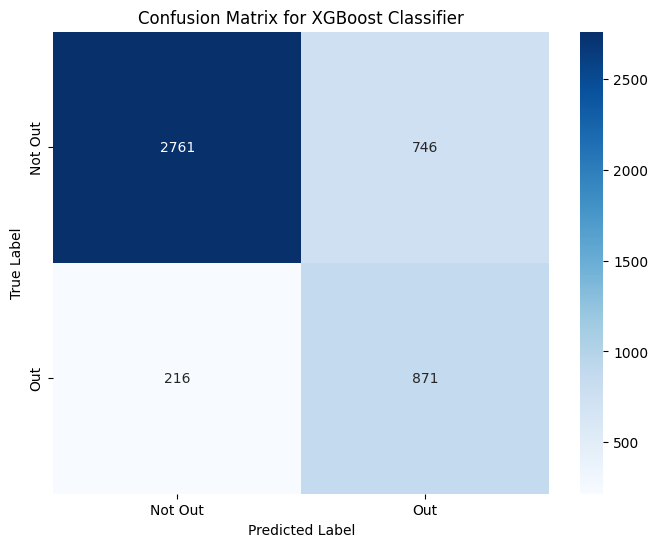

In [73]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, max_depth=10, learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train_resampled, y_train_resampled)

# predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

metricsandconfusionmatrix (y_test,y_pred_xgb,"XGBoost Classifier")

# Lift And Gain Curves For Model Performance Evaluation

In [74]:
## Function for plotting lift and gains at the same time 

def plot_lift_and_gains(y_true, y_probs, model_name, positive_label=1):
    # Sort by predicted probabilities in descending order
    sorted_indices = np.argsort(y_probs)[::-1]
    y_true_sorted = np.array(y_true)[sorted_indices]

    # Cumulative Gains for the positive class
    cumulative_gains_positive = np.cumsum(y_true_sorted == positive_label) / np.sum(y_true == positive_label)
    percentage_of_samples = np.arange(1, len(y_true_sorted) + 1) / len(y_true_sorted)

    # Lift for the positive class
    lift_positive = cumulative_gains_positive / percentage_of_samples

    # Cumulative Gains for the negative class
    cumulative_gains_negative = np.cumsum(y_true_sorted != positive_label) / np.sum(y_true != positive_label)

    # Lift for the negative class
    lift_negative = cumulative_gains_negative / percentage_of_samples

    # Plot the Cumulative Gains Curve
    plt.figure(figsize=(12, 6))
    plt.plot(percentage_of_samples, cumulative_gains_positive, label=f'Cumulative Gains - {model_name} (Out)')
    plt.plot(percentage_of_samples, cumulative_gains_negative, label=f'Cumulative Gains - {model_name} (Not Out)', linestyle='--')
    plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
    plt.xlabel('Percentage of Samples')
    plt.ylabel('Cumulative Gain')
    plt.title(f'Cumulative Gains Curve - {model_name}')
    plt.legend()
    plt.show()

    # Plot the Lift Curve
    plt.figure(figsize=(12, 6))
    plt.plot(percentage_of_samples, lift_positive, label=f'Lift - {model_name} (Out)')
    plt.plot(percentage_of_samples, lift_negative, label=f'Lift - {model_name} (Not Out)', linestyle='--')
    plt.plot([0, 1], [1, 1], 'k--', label='Baseline')
    plt.xlabel('Percentage of Samples')
    plt.ylabel('Lift')
    plt.title(f'Lift Curve - {model_name}')
    plt.legend()
    plt.show()


# Lift And Gains For Random Forest

In [75]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

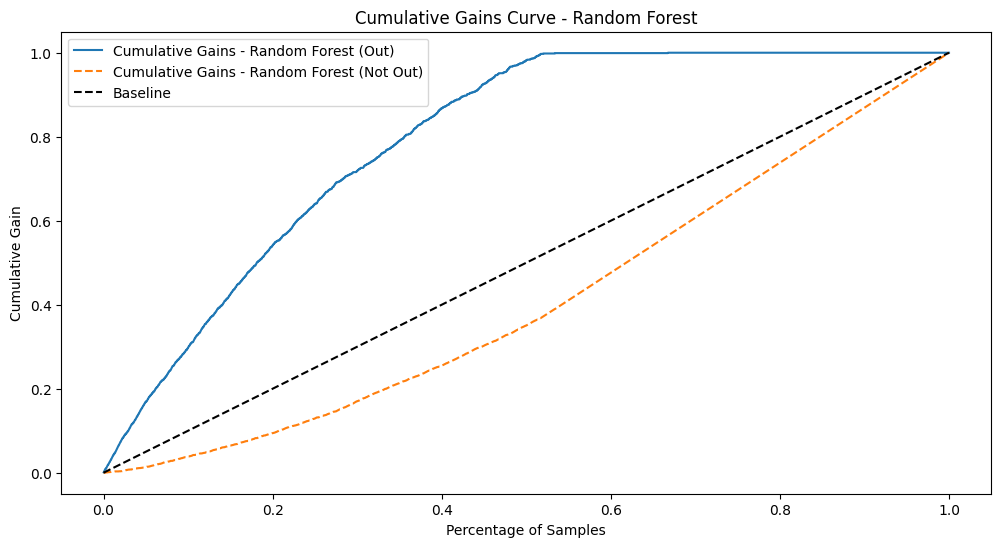

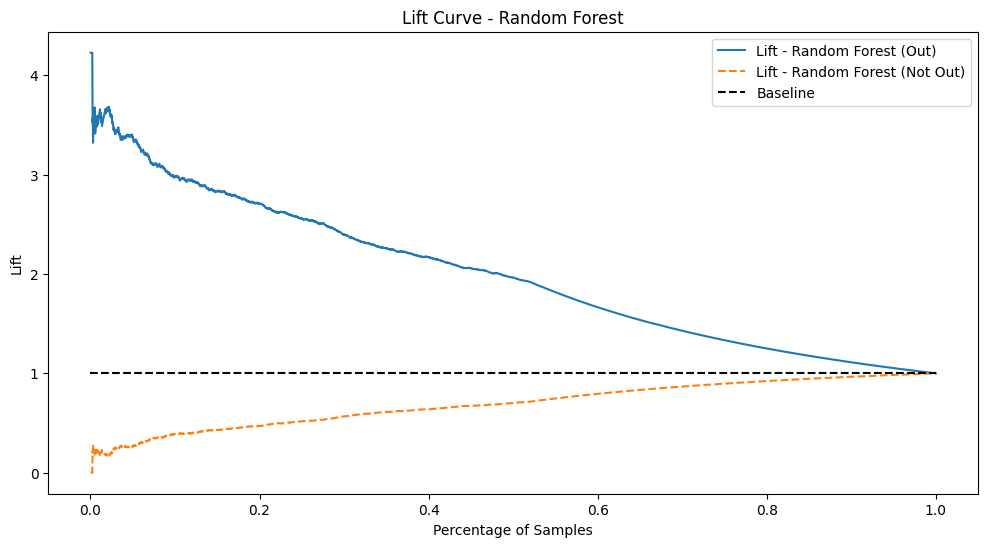

In [76]:
plot_lift_and_gains(y_test, y_probs_rf, "Random Forest")

# Lift And Gains for XGBoost Classifier

In [77]:
# XGBoost Classifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

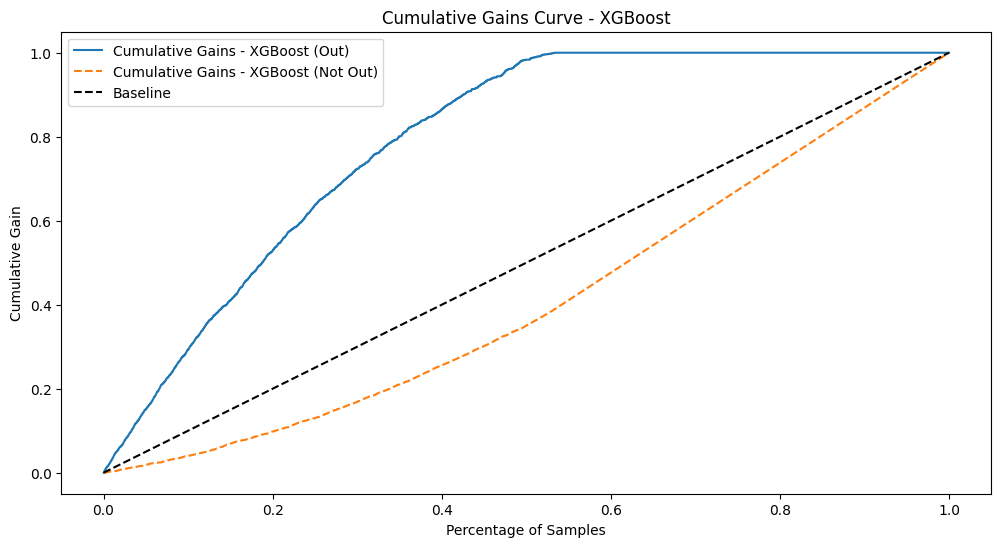

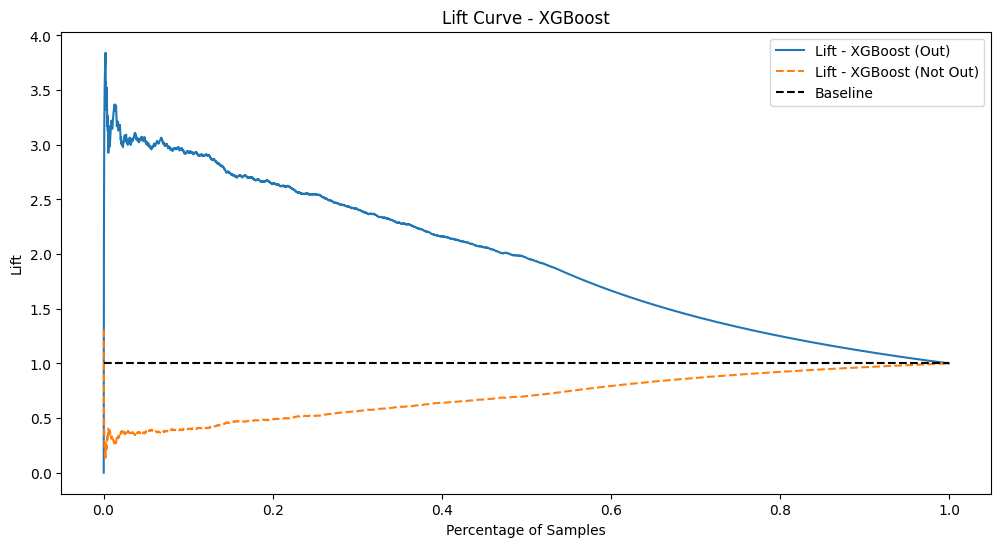

In [78]:
plot_lift_and_gains(y_test, y_probs_xgb, "XGBoost")

# Lift And Gains For Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr_model = LogisticRegression(max_iter=100, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)
y_probs_lr = lr_model.predict_proba(X_test)[:, 1]

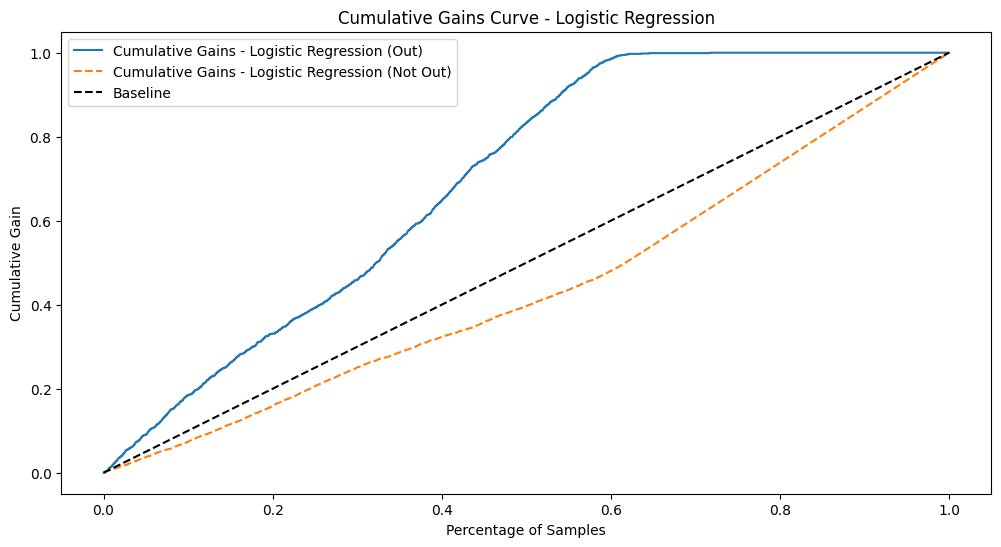

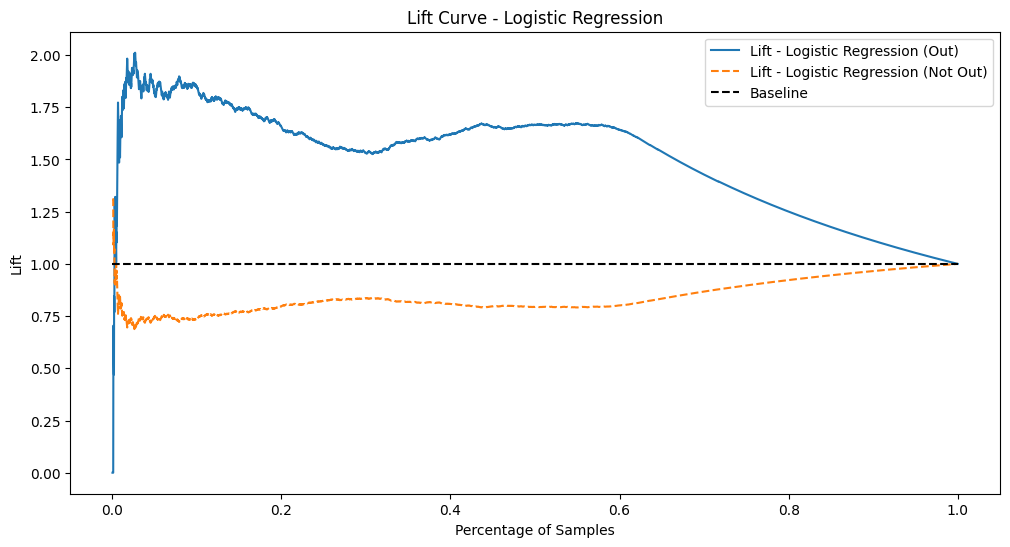

In [80]:
plot_lift_and_gains(y_test, y_probs_lr, "Logistic Regression")

# Lift And Gain For Decision Tree Classifier

In [81]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)
dt_model.fit(X_train_resampled, y_train_resampled)
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]

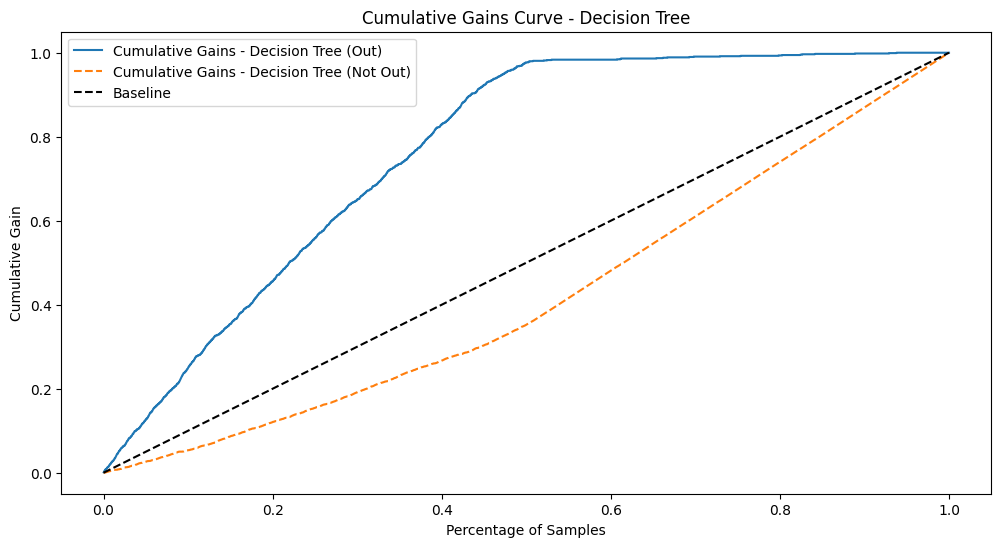

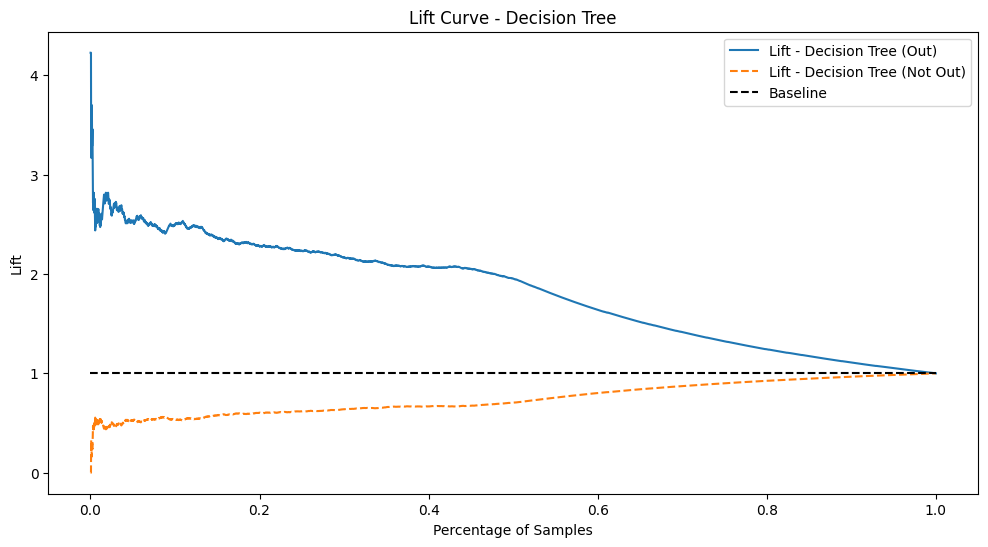

In [82]:
plot_lift_and_gains(y_test, y_probs_dt, "Decision Tree")

# Models Performance Comparison

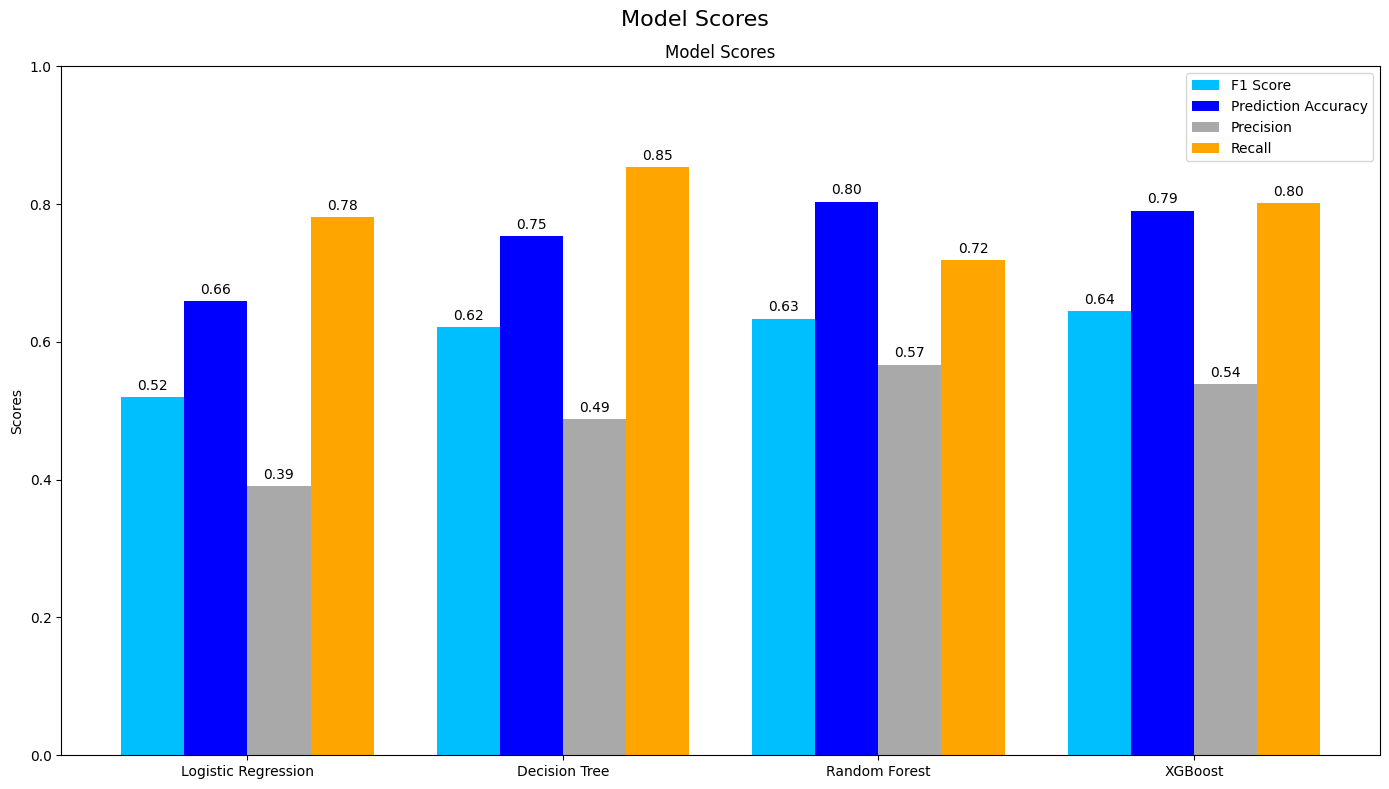

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=10,min_samples_leaf=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, max_depth=10, learning_rate=0.1, n_estimators=100)
}

# Dictionaries to store metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Train each model, make predictions, and compute metrics
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    precision_scores[model_name] = precision_score(y_test, y_pred)
    recall_scores[model_name] = recall_score(y_test, y_pred)
    f1_scores[model_name] = f1_score(y_test, y_pred)

# Plot the metrics
metrics = ['F1 Score', 'Prediction Accuracy', 'Precision', 'Recall']
model_names = list(models.keys())
scores = [
    [f1_scores[model] for model in model_names],
    [accuracy_scores[model] for model in model_names],
    [precision_scores[model] for model in model_names],
    [recall_scores[model] for model in model_names]
]

# Set up bar chart properties
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('Model Scores', fontsize=16)

# Plotting each metric
bars1 = ax.bar(x - 1.5*width, scores[0], width, label='F1 Score', color='deepskyblue')
bars2 = ax.bar(x - 0.5*width, scores[1], width, label='Prediction Accuracy', color='blue')
bars3 = ax.bar(x + 0.5*width, scores[2], width, label='Precision', color='darkgray')
bars4 = ax.bar(x + 1.5*width, scores[3], width, label='Recall', color='orange')

# titles and labels
ax.set_title('Model Scores')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.0)

# Annotate the bars with the exact metric values
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Format to 2 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text by 3 points above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show legend
ax.legend(loc='best', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.show()